Лабораторная работа № 1. Численное интегрирование обыкновенных дифференциальных уравнений первого порядка методами Эйлера и Эйлера – Коши


Уравнение: y' = math.exp(-x)+2*y
Начальное условие: y(0.0) = 0.5
Отрезок: [0.0, 1.5]
Точность: ε = 0.001

МЕТОД ЭЙЛЕРА:
h² ≤ ε: 0.1² = 0.010000 ≤ 0.010000
n = (b - x₀)/h = (1.5 - 0.0)/0.1 = 15
k = 0: x_0 = 0.0000, y_0 = 0.5000

k = 1:
x_1 = x_0 + h = 0.0000 + 0.1000 = 0.1000
f(x_0, y_0) = math.e0.0000p(-0.0000)+2*0.5000 = 2.0000
y_1 = y_0 + h·f(x_0, y_0) = 0.5000 + 0.1000·2.0000 = 0.7000

k = 2:
x_2 = x_1 + h = 0.1000 + 0.1000 = 0.2000
f(x_1, y_1) = math.e0.1000p(-0.1000)+2*0.7000 = 2.3048
y_2 = y_1 + h·f(x_1, y_1) = 0.7000 + 0.1000·2.3048 = 0.9305

k = 3:
x_3 = x_2 + h = 0.2000 + 0.1000 = 0.3000
f(x_2, y_2) = math.e0.2000p(-0.2000)+2*0.9305 = 2.6797
y_3 = y_2 + h·f(x_2, y_2) = 0.9305 + 0.1000·2.6797 = 1.1985

k = 4:
x_4 = x_3 + h = 0.3000 + 0.1000 = 0.4000
f(x_3, y_3) = math.e0.3000p(-0.3000)+2*1.1985 = 3.1377
y_4 = y_3 + h·f(x_3, y_3) = 1.1985 + 0.1000·3.1377 = 1.5122

k = 5:
x_5 = x_4 + h = 0.4000 + 0.1000 = 0.5000
f(x_4, y_4) = math.e0.4000p(-0.4000)+2*1.5122 = 3.6948
y_5 = y_4 + 

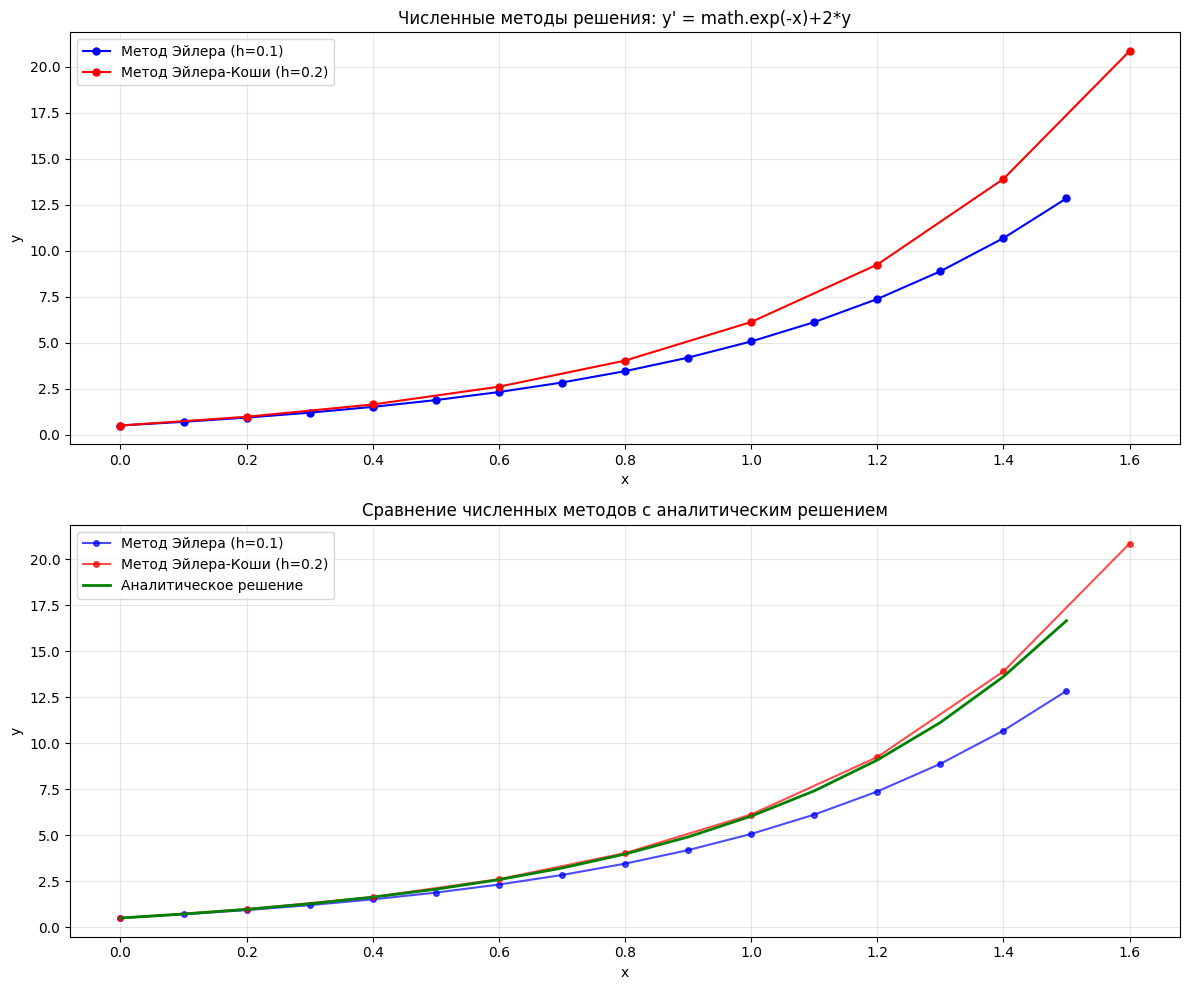

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

# math.exp(-x) + 2*y

# Функция парсинга уравнения
def parse_equation(equation_str):
    return lambda x, y: eval(equation_str, {"x": x, "y": y, "math": math, "np": np})

# Метод Эйлера
def euler_method(f, x0, y0, b, h, digits, equation_str):
    x_vals, y_vals = [round(x0, digits)], [round(y0, digits)]
    x, y = x0, y0
    k = 0
    
    print(f"\nМЕТОД ЭЙЛЕРА:")
    print(f"h² ≤ ε: {h}² = {h**2:.6f} ≤ {h**2:.6f}")
    print(f"n = (b - x₀)/h = ({b} - {x0})/{h} = {int((b-x0)/h)}")
    print(f"k = {k}: x_{k} = {x:.{digits}f}, y_{k} = {y:.{digits}f}")
    
    while x < b - 1e-12:
        k += 1
        f_val = f(x, y)
        y_next = y + h * f_val
        x_next = x + h
        
        print(f"\nk = {k}:")
        print(f"x_{k} = x_{k-1} + h = {x:.{digits}f} + {h:.{digits}f} = {x_next:.{digits}f}")
        print(f"f(x_{k-1}, y_{k-1}) = {equation_str.replace('x', f'{x:.{digits}f}').replace('y', f'{y:.{digits}f}')} = {f_val:.{digits}f}")
        print(f"y_{k} = y_{k-1} + h·f(x_{k-1}, y_{k-1}) = {y:.{digits}f} + {h:.{digits}f}·{f_val:.{digits}f} = {y_next:.{digits}f}")
        
        x, y = x_next, y_next
        x_vals.append(round(x, digits))
        y_vals.append(round(y, digits))
    
    return x_vals, y_vals

# Метод Эйлера-Коши (улучшенный)
def euler_cauchy_method(f, x0, y0, b, h, digits, equation_str):
    x_vals, y_vals = [round(x0, digits)], [round(y0, digits)]
    x, y = x0, y0
    k = 0
    
    print(f"\nМЕТОД ЭЙЛЕРА-КОШИ:")
    print(f"h³ ≤ ε: {h}³ = {h**3:.6f} ≤ {h**3:.6f}")
    print(f"n = (b - x₀)/h = ({b} - {x0})/{h} = {int((b-x0)/h)}")
    print(f"k = {k}: x_{k} = {x:.{digits}f}, y_{k} = {y:.{digits}f}")
    
    while x < b - 1e-12:
        k += 1
        x_next = x + h
        
        f_val = f(x, y)
        y0_next = y + h * f_val  # Предиктор
        
        f_corr = f(x_next, y0_next)  # Корректор
        y1_next = y + (h/2) * (f_val + f_corr)  # Первый корректирующий шаг
        
        # Дополнительная итерация для уточнения (если нужно)
        f_corr2 = f(x_next, y1_next)
        y2_next = y + (h/2) * (f_val + f_corr2)
        
        print(f"\nk = {k}:")
        print(f"x_{k} = x_{k-1} + h = {x:.{digits}f} + {h:.{digits}f} = {x_next:.{digits}f}")
        print(f"y_{k}⁽⁰⁾ = y_{k-1} + h·f(x_{k-1}, y_{k-1}) = {y:.{digits}f} + {h:.{digits}f}·{f_val:.{digits}f} = {y0_next:.{digits}f}")
        print(f"y_{k}⁽¹⁾ = y_{k-1} + h/2·[f(x_{k-1}, y_{k-1}) + f(x_{k}, y_{k}⁽⁰⁾)] = {y:.{digits}f} + {h/2:.{digits}f}·[{f_val:.{digits}f} + {f_corr:.{digits}f}] = {y1_next:.{digits}f}")
        print(f"y_{k}⁽²⁾ = y_{k-1} + h/2·[f(x_{k-1}, y_{k-1}) + f(x_{k}, y_{k}⁽¹⁾)] = {y:.{digits}f} + {h/2:.{digits}f}·[{f_val:.{digits}f} + {f_corr2:.{digits}f}] = {y2_next:.{digits}f}")
        
        # Используем y2_next как окончательное значение (можно сделать итерационно, но здесь просто берем y2)
        y = y2_next
        x = x_next
        x_vals.append(round(x, digits))
        y_vals.append(round(y, digits))
    
    return x_vals, y_vals

# АНАЛИТИЧЕСКОЕ РЕШЕНИЕ для y' = exp(-x) + 2*y
def analytical_solution(x_vals, x0, y0, digits):
    # y(x) = C * exp(2x) - (1/3)*exp(-x)
    # y(0) = y0 => y0 = C * 1 - 1/3 => C = y0 + 1/3
    C = y0 + 1/3
    y_vals = [round(C * math.exp(2 * x) - (1/3) * math.exp(-x), digits) for x in x_vals]
    formula = f"y(x) = ({C:.{digits}f})·e^({2}x) - (1/3)·e^(-x)"
    return y_vals, formula

def main():
    # Задаём уравнение по умолчанию
    equation_str = input("Введите уравнение (например, 'math.exp(-x) + 2*y'): ") or "math.exp(-x) + 2*y"
    x0 = float(input(f"Введите x0 (по умолчанию {0.0}): ") or 0.0)
    y0 = float(input(f"Введите y0 (по умолчанию {0.5}): ") or 0.5)  # Как в примере выше
    b = float(input(f"Введите b (по умолчанию {1.5}): ") or 1.5)   # Как в примере выше
    precision = float(input(f"Введите точность ε (по умолчанию {0.001}): ") or 0.001)
    digits = 4  # Увеличим точность вывода для наглядности
    
    f = parse_equation(equation_str)
    
    h_euler = 0.1
    h_cauchy = 0.2
    
    print(f"\nУравнение: y' = {equation_str}")
    print(f"Начальное условие: y({x0}) = {y0}")
    print(f"Отрезок: [{x0}, {b}]")
    print(f"Точность: ε = {precision}")
    
    # Численные методы
    x_eul, y_eul = euler_method(f, x0, y0, b, h_euler, digits, equation_str)
    x_cau, y_cau = euler_cauchy_method(f, x0, y0, b, h_cauchy, digits, equation_str)
    
    # Аналитическое решение
    x_ana = np.arange(x0, b + h_euler/2, h_euler)
    y_ana, formula = analytical_solution(x_ana, x0, y0, digits)
    
    print(f"\nАНАЛИТИЧЕСКОЕ РЕШЕНИЕ:")
    for i, x in enumerate(x_ana):
        print(f"x = {x:.{digits}f}, y = {y_ana[i]:.{digits}f}")
    
    # Таблицы результатов
    print(f"\nТАБЛИЦА Метод Эйлера (h = {h_euler})")
    print("k    x_k       y_k")
    print("-" * 25)
    for k, (x, y) in enumerate(zip(x_eul, y_eul)):
        print(f"{k:<4} {x:<8.4f} {y:<8.4f}")
    
    print(f"\nТАБЛИЦА Метод Эйлера-Коши (h = {h_cauchy})")
    print("k    x_k       y_k")
    print("-" * 25)
    for k, (x, y) in enumerate(zip(x_cau, y_cau)):
        print(f"{k:<4} {x:<8.4f} {y:<8.4f}")
    
    # Сравнение точности
    print(f"\nСРАВНЕНИЕ ТОЧНОСТИ МЕТОДОВ:")
    print("x     Эйлер      Эйлер-Коши   Аналит.     Ошибка Эйлера   Ошибка Э-К")
    print("-" * 75)
    
    x_compare = np.linspace(x0, b, 10)
    
    for x_val in x_compare:
        y_e = np.interp(x_val, x_eul, y_eul)
        y_ec = np.interp(x_val, x_cau, y_cau)
        y_a = np.interp(x_val, x_ana, y_ana)
        err_e = abs(y_e - y_a)
        err_ec = abs(y_ec - y_a)
        print(f"{x_val:.3f}   {y_e:.6f}   {y_ec:.6f}     {y_a:.6f}     {err_e:.6f}       {err_ec:.6f}")

    # Графики
    plt.figure(figsize=(12, 10))

    plt.subplot(2, 1, 1)
    plt.plot(x_eul, y_eul, 'bo-', label=f'Метод Эйлера (h={h_euler})', markersize=5)
    plt.plot(x_cau, y_cau, 'ro-', label=f'Метод Эйлера-Коши (h={h_cauchy})', markersize=5)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Численные методы решения: y\' = {equation_str}')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(2, 1, 2)
    plt.plot(x_eul, y_eul, 'bo-', label=f'Метод Эйлера (h={h_euler})', markersize=4, alpha=0.7)
    plt.plot(x_cau, y_cau, 'ro-', label=f'Метод Эйлера-Коши (h={h_cauchy})', markersize=4, alpha=0.7)
    plt.plot(x_ana, y_ana, 'g-', label='Аналитическое решение', linewidth=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Сравнение численных методов с аналитическим решением')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

Лабораторная работа № 2. Численное интегрирование обыкновенных дифференциальных уравнений первого порядка методом Рунге – Кутты


Уравнение: y' = math.exp(-x) + 2*y
Начальное условие: y(0.0) = 0.5
Отрезок: [0.0, 1.5]
Точность: ε = 0.001

МЕТОД ЭЙЛЕРА:
h² ≤ ε: 0.1² = 0.010000 ≤ 0.010000
n = (b - x₀)/h = (1.5 - 0.0)/0.1 = 15
k = 0: x_0 = 0.0000, y_0 = 0.5000

k = 1:
x_1 = x_0 + h = 0.0000 + 0.1000 = 0.1000
f(x_0, y_0) = math.e0.0000p(-0.0000) + 2*0.5000 = 2.0000
y_1 = y_0 + h·f(x_0, y_0) = 0.5000 + 0.1000·2.0000 = 0.7000

k = 2:
x_2 = x_1 + h = 0.1000 + 0.1000 = 0.2000
f(x_1, y_1) = math.e0.1000p(-0.1000) + 2*0.7000 = 2.3048
y_2 = y_1 + h·f(x_1, y_1) = 0.7000 + 0.1000·2.3048 = 0.9305

k = 3:
x_3 = x_2 + h = 0.2000 + 0.1000 = 0.3000
f(x_2, y_2) = math.e0.2000p(-0.2000) + 2*0.9305 = 2.6797
y_3 = y_2 + h·f(x_2, y_2) = 0.9305 + 0.1000·2.6797 = 1.1985

k = 4:
x_4 = x_3 + h = 0.3000 + 0.1000 = 0.4000
f(x_3, y_3) = math.e0.3000p(-0.3000) + 2*1.1985 = 3.1377
y_4 = y_3 + h·f(x_3, y_3) = 1.1985 + 0.1000·3.1377 = 1.5122

k = 5:
x_5 = x_4 + h = 0.4000 + 0.1000 = 0.5000
f(x_4, y_4) = math.e0.4000p(-0.4000) + 2*1.5122 = 3.6948


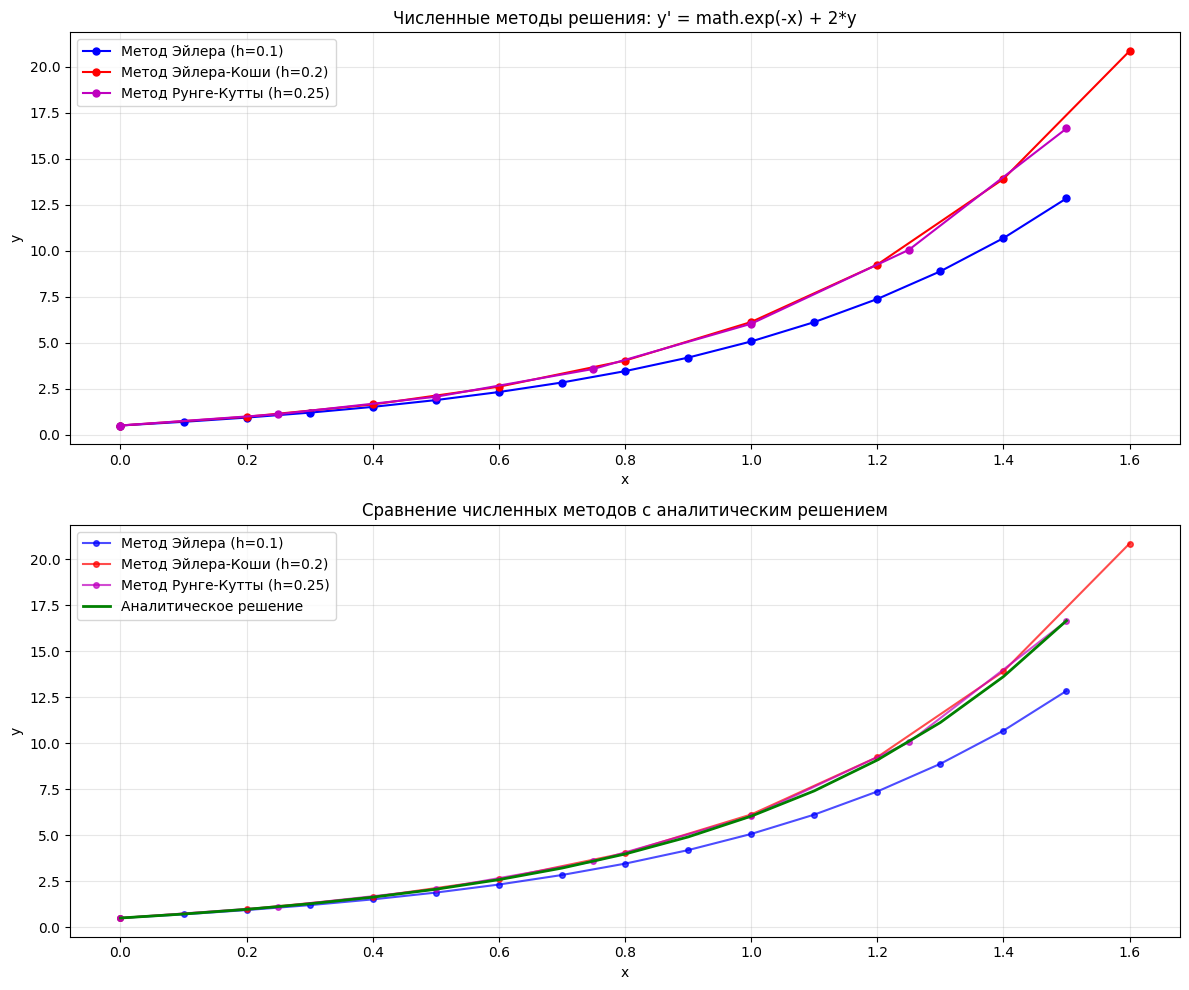

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt

# math.exp(-x) + 2*y

# Функция парсинга уравнения
def parse_equation(equation_str):
    return lambda x, y: eval(equation_str, {"x": x, "y": y, "math": math, "np": np})

# Метод Эйлера
def euler_method(f, x0, y0, b, h, digits, equation_str):
    x_vals, y_vals = [round(x0, digits)], [round(y0, digits)]
    x, y = x0, y0
    k = 0
    
    print(f"\nМЕТОД ЭЙЛЕРА:")
    print(f"h² ≤ ε: {h}² = {h**2:.6f} ≤ {h**2:.6f}")
    print(f"n = (b - x₀)/h = ({b} - {x0})/{h} = {int((b-x0)/h)}")
    print(f"k = {k}: x_{k} = {x:.{digits}f}, y_{k} = {y:.{digits}f}")
    
    while x < b - 1e-12:
        k += 1
        f_val = f(x, y)
        y_next = y + h * f_val
        x_next = x + h
        
        print(f"\nk = {k}:")
        print(f"x_{k} = x_{k-1} + h = {x:.{digits}f} + {h:.{digits}f} = {x_next:.{digits}f}")
        print(f"f(x_{k-1}, y_{k-1}) = {equation_str.replace('x', f'{x:.{digits}f}').replace('y', f'{y:.{digits}f}')} = {f_val:.{digits}f}")
        print(f"y_{k} = y_{k-1} + h·f(x_{k-1}, y_{k-1}) = {y:.{digits}f} + {h:.{digits}f}·{f_val:.{digits}f} = {y_next:.{digits}f}")
        
        x, y = x_next, y_next
        x_vals.append(round(x, digits))
        y_vals.append(round(y, digits))
    
    return x_vals, y_vals

# Метод Эйлера-Коши (улучшенный)
def euler_cauchy_method(f, x0, y0, b, h, digits, equation_str):
    x_vals, y_vals = [round(x0, digits)], [round(y0, digits)]
    x, y = x0, y0
    k = 0
    
    print(f"\nМЕТОД ЭЙЛЕРА-КОШИ:")
    print(f"h³ ≤ ε: {h}³ = {h**3:.6f} ≤ {h**3:.6f}")
    print(f"n = (b - x₀)/h = ({b} - {x0})/{h} = {int((b-x0)/h)}")
    print(f"k = {k}: x_{k} = {x:.{digits}f}, y_{k} = {y:.{digits}f}")
    
    while x < b - 1e-12:
        k += 1
        x_next = x + h
        
        f_val = f(x, y)
        y0_next = y + h * f_val  # Предиктор
        
        f_corr = f(x_next, y0_next)  # Корректор
        y1_next = y + (h/2) * (f_val + f_corr)  # Первый корректирующий шаг
        
        # Дополнительная итерация для уточнения
        f_corr2 = f(x_next, y1_next)
        y2_next = y + (h/2) * (f_val + f_corr2)
        
        print(f"\nk = {k}:")
        print(f"x_{k} = x_{k-1} + h = {x:.{digits}f} + {h:.{digits}f} = {x_next:.{digits}f}")
        print(f"y_{k}⁽⁰⁾ = y_{k-1} + h·f(x_{k-1}, y_{k-1}) = {y:.{digits}f} + {h:.{digits}f}·{f_val:.{digits}f} = {y0_next:.{digits}f}")
        print(f"y_{k}⁽¹⁾ = y_{k-1} + h/2·[f(x_{k-1}, y_{k-1}) + f(x_{k}, y_{k}⁽⁰⁾)] = {y:.{digits}f} + {h/2:.{digits}f}·[{f_val:.{digits}f} + {f_corr:.{digits}f}] = {y1_next:.{digits}f}")
        print(f"y_{k}⁽²⁾ = y_{k-1} + h/2·[f(x_{k-1}, y_{k-1}) + f(x_{k}, y_{k}⁽¹⁾)] = {y:.{digits}f} + {h/2:.{digits}f}·[{f_val:.{digits}f} + {f_corr2:.{digits}f}] = {y2_next:.{digits}f}")
        
        y = y2_next
        x = x_next
        x_vals.append(round(x, digits))
        y_vals.append(round(y, digits))
    
    return x_vals, y_vals

# МЕТОД РУНГЕ-КУТТЫ 4-ГО ПОРЯДКА (с детальным выводом как в примере)
def runge_kutta_4th_method(f, x0, y0, b, h, digits, equation_str):
    x_vals, y_vals = [round(x0, digits)], [round(y0, digits)]
    x, y = x0, y0
    k = 0
    
    print(f"\nМЕТОД РУНГЕ-КУТТЫ 4-ГО ПОРЯДКА:")
    print(f"h⁵ ≤ ε: {h}⁵ = {h**5:.6f} ≤ {h**5:.6f}")
    print(f"n = (b - x₀)/h = ({b} - {x0})/{h} = {int((b-x0)/h)}")
    print(f"k = {k}: x_{k} = {x:.{digits}f}, y_{k} = {y:.{digits}f}")
    
    while x < b - 1e-12:
        k += 1
        x_next = x + h
        
        # Вычисляем g1, g2, g3, g4
        g1 = h * f(x, y)
        g2 = h * f(x + h/2, y + g1/2)
        g3 = h * f(x + h/2, y + g2/2)
        g4 = h * f(x + h, y + g3)
        
        delta_y = (g1 + 2*g2 + 2*g3 + g4) / 6
        y_next = y + delta_y
        
        # Вывод по образцу
        print(f"\nk = {k}:")
        print(f"x_{k} = x_{k-1} + h = {x:.{digits}f} + {h:.{digits}f} = {x_next:.{digits}f}")
        print(f"g₁⁽{k-1}⁾ = h·f(x_{k-1}, y_{k-1}) = {h:.{digits}f}·{f(x, y):.{digits}f} = {g1:.{digits}f}")
        print(f"g₂⁽{k-1}⁾ = h·f(x_{k-1}+h/2, y_{k-1}+g₁/2) = {h:.{digits}f}·f({x+h/2:.{digits}f}, {y+g1/2:.{digits}f}) = {g2:.{digits}f}")
        print(f"g₃⁽{k-1}⁾ = h·f(x_{k-1}+h/2, y_{k-1}+g₂/2) = {h:.{digits}f}·f({x+h/2:.{digits}f}, {y+g2/2:.{digits}f}) = {g3:.{digits}f}")
        print(f"g₄⁽{k-1}⁾ = h·f(x_{k-1}+h, y_{k-1}+g₃) = {h:.{digits}f}·f({x+h:.{digits}f}, {y+g3:.{digits}f}) = {g4:.{digits}f}")
        print(f"Δy_{k-1} = (g₁ + 2g₂ + 2g₃ + g₄)/6 = ({g1:.{digits}f} + 2·{g2:.{digits}f} + 2·{g3:.{digits}f} + {g4:.{digits}f})/6 = {delta_y:.{digits}f}")
        print(f"y_{k} = y_{k-1} + Δy_{k-1} = {y:.{digits}f} + {delta_y:.{digits}f} = {y_next:.{digits}f}")
        
        x, y = x_next, y_next
        x_vals.append(round(x, digits))
        y_vals.append(round(y, digits))
    
    return x_vals, y_vals

# АНАЛИТИЧЕСКОЕ РЕШЕНИЕ для y' = exp(-x) + 2*y
def analytical_solution(x_vals, x0, y0, digits):
    C = y0 + 1/3
    y_vals = [round(C * math.exp(2 * x) - (1/3) * math.exp(-x), digits) for x in x_vals]
    formula = f"y(x) = ({C:.{digits}f})·e^({2}x) - (1/3)·e^(-x)"
    return y_vals, formula

def main():
    # Задаём уравнение по умолчанию
    equation_str = input("Введите уравнение (например, 'math.exp(-x) + 2*y'): ") or "math.exp(-x) + 2*y"
    x0 = float(input(f"Введите x0 (по умолчанию {0.0}): ") or 0.0)
    y0 = float(input(f"Введите y0 (по умолчанию {0.5}): ") or 0.5)
    b = float(input(f"Введите b (по умолчанию {1.5}): ") or 1.5)
    precision = float(input(f"Введите точность ε (по умолчанию {0.001}): ") or 0.001)
    digits = 4  # Увеличим точность вывода для наглядности
    
    f = parse_equation(equation_str)
    
    h_euler = 0.1
    h_cauchy = 0.2
    h_rk = 0.25  # Как в примере с RK4
    
    print(f"\nУравнение: y' = {equation_str}")
    print(f"Начальное условие: y({x0}) = {y0}")
    print(f"Отрезок: [{x0}, {b}]")
    print(f"Точность: ε = {precision}")
    
    # Численные методы
    x_eul, y_eul = euler_method(f, x0, y0, b, h_euler, digits, equation_str)
    x_cau, y_cau = euler_cauchy_method(f, x0, y0, b, h_cauchy, digits, equation_str)
    x_rk, y_rk = runge_kutta_4th_method(f, x0, y0, b, h_rk, digits, equation_str)
    
    # Аналитическое решение
    x_ana = np.arange(x0, b + h_euler/2, h_euler)
    y_ana, formula = analytical_solution(x_ana, x0, y0, digits)
    
    print(f"\nАНАЛИТИЧЕСКОЕ РЕШЕНИЕ:")
    for i, x in enumerate(x_ana):
        print(f"x = {x:.{digits}f}, y = {y_ana[i]:.{digits}f}")
    
    # Таблицы результатов
    print(f"\nТАБЛИЦА Метод Эйлера (h = {h_euler})")
    print("k    x_k       y_k")
    print("-" * 25)
    for k, (x, y) in enumerate(zip(x_eul, y_eul)):
        print(f"{k:<4} {x:<8.4f} {y:<8.4f}")
    
    print(f"\nТАБЛИЦА Метод Эйлера-Коши (h = {h_cauchy})")
    print("k    x_k       y_k")
    print("-" * 25)
    for k, (x, y) in enumerate(zip(x_cau, y_cau)):
        print(f"{k:<4} {x:<8.4f} {y:<8.4f}")
    
    print(f"\nТАБЛИЦА Метод Рунге-Кутты (h = {h_rk})")
    print("k    x_k       y_k")
    print("-" * 25)
    for k, (x, y) in enumerate(zip(x_rk, y_rk)):
        print(f"{k:<4} {x:<8.4f} {y:<8.4f}")
    
    # СРАВНЕНИЕ ТОЧНОСТИ
    print(f"\nСРАВНЕНИЕ ТОЧНОСТИ МЕТОДОВ:")
    print("x     Эйлер      Эйлер-Коши   Рунге-Кутта  Аналит.   Ошибка РК")
    print("-" * 75)
    
    x_compare = np.linspace(x0, b, 10)
    
    for x_val in x_compare:
        y_e = np.interp(x_val, x_eul, y_eul)
        y_ec = np.interp(x_val, x_cau, y_cau)
        y_r = np.interp(x_val, x_rk, y_rk)
        y_a = np.interp(x_val, x_ana, y_ana)
        err_rk = abs(y_r - y_a)
        print(f"{x_val:.3f}   {y_e:.6f}   {y_ec:.6f}     {y_r:.6f}     {y_a:.6f}     {err_rk:.6f}")

    # Графики
    plt.figure(figsize=(12, 10))

    plt.subplot(2, 1, 1)
    plt.plot(x_eul, y_eul, 'bo-', label=f'Метод Эйлера (h={h_euler})', markersize=5)
    plt.plot(x_cau, y_cau, 'ro-', label=f'Метод Эйлера-Коши (h={h_cauchy})', markersize=5)
    plt.plot(x_rk, y_rk, 'mo-', label=f'Метод Рунге-Кутты (h={h_rk})', markersize=5)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Численные методы решения: y\' = {equation_str}')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(2, 1, 2)
    plt.plot(x_eul, y_eul, 'bo-', label=f'Метод Эйлера (h={h_euler})', markersize=4, alpha=0.7)
    plt.plot(x_cau, y_cau, 'ro-', label=f'Метод Эйлера-Коши (h={h_cauchy})', markersize=4, alpha=0.7)
    plt.plot(x_rk, y_rk, 'mo-', label=f'Метод Рунге-Кутты (h={h_rk})', markersize=4, alpha=0.7)
    plt.plot(x_ana, y_ana, 'g-', label='Аналитическое решение', linewidth=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Сравнение численных методов с аналитическим решением')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

Лабораторная работа № 3. Численное интегрирование обыкновенных дифференциальных уравнений первого порядка методом Адамса 


Уравнение: y' = math.exp(-x) + 2*y
Начальное условие: y(0.0) = 0.5
Отрезок: [0.0, 1.5]
Точность: ε = 0.001

МЕТОД ЭЙЛЕРА:
h² ≤ ε: 0.1² = 0.010000 ≤ 0.010000
n = (b - x₀)/h = (1.5 - 0.0)/0.1 = 15
k = 0: x_0 = 0.0000, y_0 = 0.5000

k = 1:
x_1 = x_0 + h = 0.0000 + 0.1000 = 0.1000
f(x_0, y_0) = math.e0.0000p(-0.0000) + 2*0.5000 = 2.0000
y_1 = y_0 + h·f(x_0, y_0) = 0.5000 + 0.1000·2.0000 = 0.7000

k = 2:
x_2 = x_1 + h = 0.1000 + 0.1000 = 0.2000
f(x_1, y_1) = math.e0.1000p(-0.1000) + 2*0.7000 = 2.3048
y_2 = y_1 + h·f(x_1, y_1) = 0.7000 + 0.1000·2.3048 = 0.9305

k = 3:
x_3 = x_2 + h = 0.2000 + 0.1000 = 0.3000
f(x_2, y_2) = math.e0.2000p(-0.2000) + 2*0.9305 = 2.6797
y_3 = y_2 + h·f(x_2, y_2) = 0.9305 + 0.1000·2.6797 = 1.1985

k = 4:
x_4 = x_3 + h = 0.3000 + 0.1000 = 0.4000
f(x_3, y_3) = math.e0.3000p(-0.3000) + 2*1.1985 = 3.1377
y_4 = y_3 + h·f(x_3, y_3) = 1.1985 + 0.1000·3.1377 = 1.5122

k = 5:
x_5 = x_4 + h = 0.4000 + 0.1000 = 0.5000
f(x_4, y_4) = math.e0.4000p(-0.4000) + 2*1.5122 = 3.6948


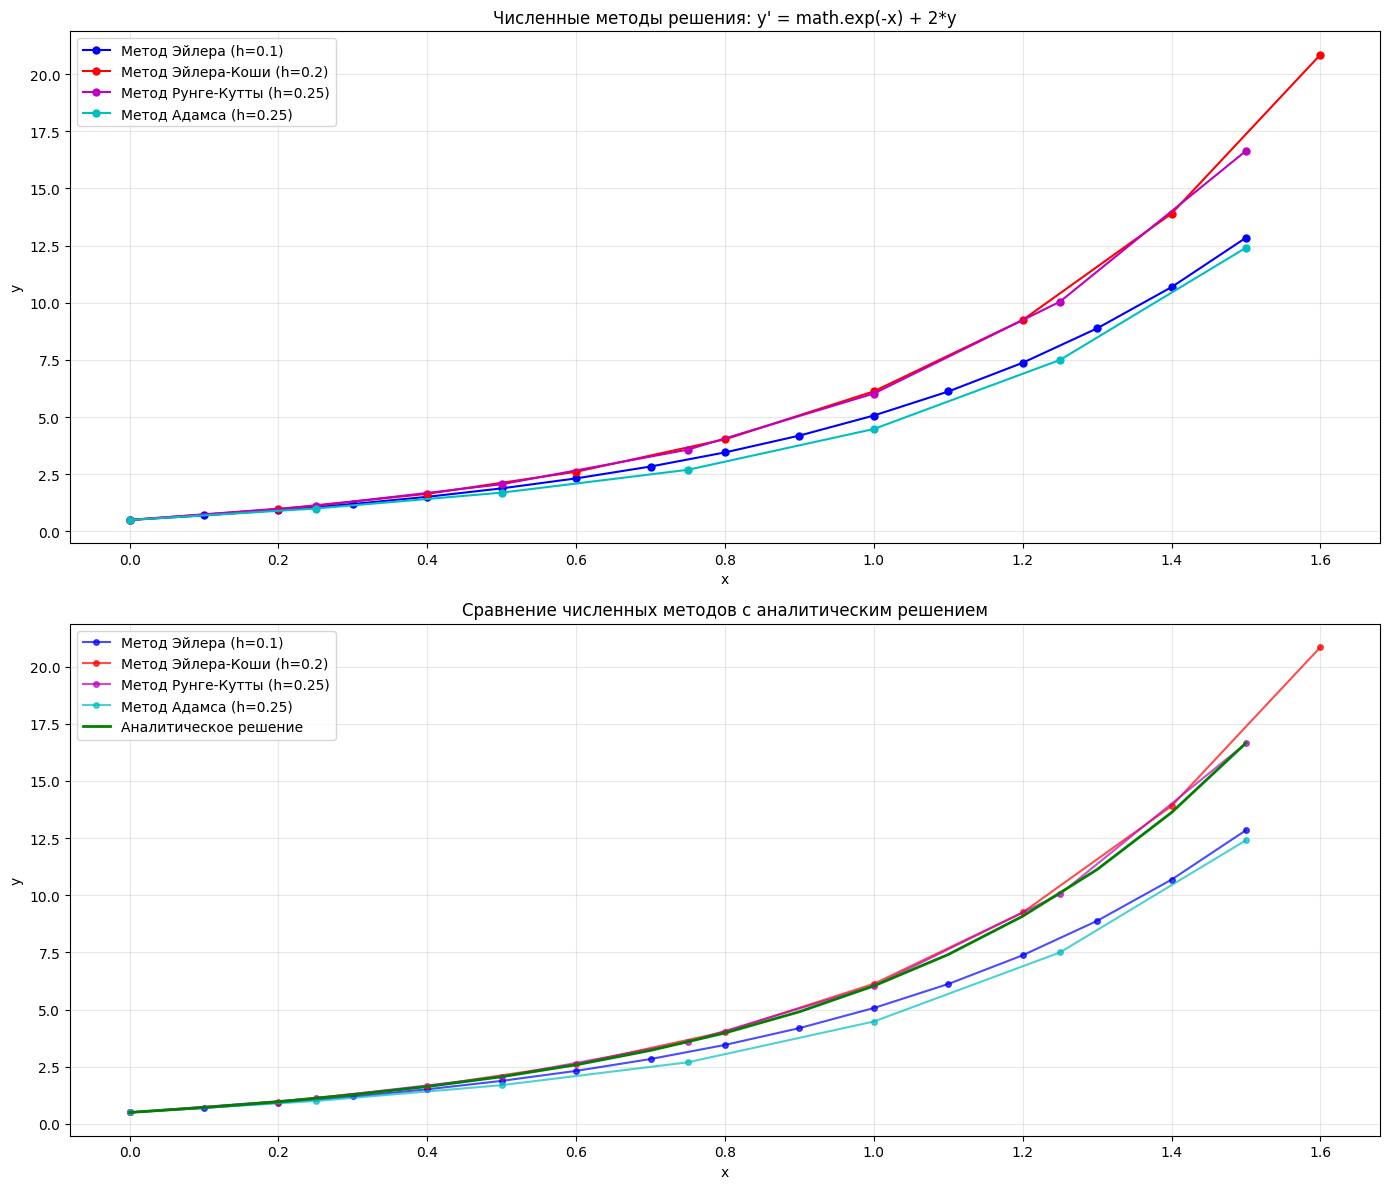

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt

# math.exp(-x) + 2*y

# Функция парсинга уравнения
def parse_equation(equation_str):
    return lambda x, y: eval(equation_str, {"x": x, "y": y, "math": math, "np": np})

# Метод Эйлера
def euler_method(f, x0, y0, b, h, digits, equation_str):
    x_vals, y_vals = [round(x0, digits)], [round(y0, digits)]
    x, y = x0, y0
    k = 0
    
    print(f"\nМЕТОД ЭЙЛЕРА:")
    print(f"h² ≤ ε: {h}² = {h**2:.6f} ≤ {h**2:.6f}")
    print(f"n = (b - x₀)/h = ({b} - {x0})/{h} = {int((b-x0)/h)}")
    print(f"k = {k}: x_{k} = {x:.{digits}f}, y_{k} = {y:.{digits}f}")
    
    while x < b - 1e-12:
        k += 1
        f_val = f(x, y)
        y_next = y + h * f_val
        x_next = x + h
        
        print(f"\nk = {k}:")
        print(f"x_{k} = x_{k-1} + h = {x:.{digits}f} + {h:.{digits}f} = {x_next:.{digits}f}")
        print(f"f(x_{k-1}, y_{k-1}) = {equation_str.replace('x', f'{x:.{digits}f}').replace('y', f'{y:.{digits}f}')} = {f_val:.{digits}f}")
        print(f"y_{k} = y_{k-1} + h·f(x_{k-1}, y_{k-1}) = {y:.{digits}f} + {h:.{digits}f}·{f_val:.{digits}f} = {y_next:.{digits}f}")
        
        x, y = x_next, y_next
        x_vals.append(round(x, digits))
        y_vals.append(round(y, digits))
    
    return x_vals, y_vals

# Метод Эйлера-Коши (улучшенный)
def euler_cauchy_method(f, x0, y0, b, h, digits, equation_str):
    x_vals, y_vals = [round(x0, digits)], [round(y0, digits)]
    x, y = x0, y0
    k = 0
    
    print(f"\nМЕТОД ЭЙЛЕРА-КОШИ:")
    print(f"h³ ≤ ε: {h}³ = {h**3:.6f} ≤ {h**3:.6f}")
    print(f"n = (b - x₀)/h = ({b} - {x0})/{h} = {int((b-x0)/h)}")
    print(f"k = {k}: x_{k} = {x:.{digits}f}, y_{k} = {y:.{digits}f}")
    
    while x < b - 1e-12:
        k += 1
        x_next = x + h
        
        f_val = f(x, y)
        y0_next = y + h * f_val  # Предиктор
        
        f_corr = f(x_next, y0_next)  # Корректор
        y1_next = y + (h/2) * (f_val + f_corr)  # Первый корректирующий шаг
        
        # Дополнительная итерация для уточнения
        f_corr2 = f(x_next, y1_next)
        y2_next = y + (h/2) * (f_val + f_corr2)
        
        print(f"\nk = {k}:")
        print(f"x_{k} = x_{k-1} + h = {x:.{digits}f} + {h:.{digits}f} = {x_next:.{digits}f}")
        print(f"y_{k}⁽⁰⁾ = y_{k-1} + h·f(x_{k-1}, y_{k-1}) = {y:.{digits}f} + {h:.{digits}f}·{f_val:.{digits}f} = {y0_next:.{digits}f}")
        print(f"y_{k}⁽¹⁾ = y_{k-1} + h/2·[f(x_{k-1}, y_{k-1}) + f(x_{k}, y_{k}⁽⁰⁾)] = {y:.{digits}f} + {h/2:.{digits}f}·[{f_val:.{digits}f} + {f_corr:.{digits}f}] = {y1_next:.{digits}f}")
        print(f"y_{k}⁽²⁾ = y_{k-1} + h/2·[f(x_{k-1}, y_{k-1}) + f(x_{k}, y_{k}⁽¹⁾)] = {y:.{digits}f} + {h/2:.{digits}f}·[{f_val:.{digits}f} + {f_corr2:.{digits}f}] = {y2_next:.{digits}f}")
        
        y = y2_next
        x = x_next
        x_vals.append(round(x, digits))
        y_vals.append(round(y, digits))
    
    return x_vals, y_vals

# МЕТОД РУНГЕ-КУТТЫ 4-ГО ПОРЯДКА (с детальным выводом как в примере)
def runge_kutta_4th_method(f, x0, y0, b, h, digits, equation_str):
    x_vals, y_vals = [round(x0, digits)], [round(y0, digits)]
    x, y = x0, y0
    k = 0
    
    print(f"\nМЕТОД РУНГЕ-КУТТЫ 4-ГО ПОРЯДКА:")
    print(f"h⁵ ≤ ε: {h}⁵ = {h**5:.6f} ≤ {h**5:.6f}")
    print(f"n = (b - x₀)/h = ({b} - {x0})/{h} = {int((b-x0)/h)}")
    print(f"k = {k}: x_{k} = {x:.{digits}f}, y_{k} = {y:.{digits}f}")
    
    while x < b - 1e-12:
        k += 1
        x_next = x + h
        
        # Вычисляем g1, g2, g3, g4
        g1 = h * f(x, y)
        g2 = h * f(x + h/2, y + g1/2)
        g3 = h * f(x + h/2, y + g2/2)
        g4 = h * f(x + h, y + g3)
        
        delta_y = (g1 + 2*g2 + 2*g3 + g4) / 6
        y_next = y + delta_y
        
        # Вывод по образцу
        print(f"\nk = {k}:")
        print(f"x_{k} = x_{k-1} + h = {x:.{digits}f} + {h:.{digits}f} = {x_next:.{digits}f}")
        print(f"g₁⁽{k-1}⁾ = h·f(x_{k-1}, y_{k-1}) = {h:.{digits}f}·{f(x, y):.{digits}f} = {g1:.{digits}f}")
        print(f"g₂⁽{k-1}⁾ = h·f(x_{k-1}+h/2, y_{k-1}+g₁/2) = {h:.{digits}f}·f({x+h/2:.{digits}f}, {y+g1/2:.{digits}f}) = {g2:.{digits}f}")
        print(f"g₃⁽{k-1}⁾ = h·f(x_{k-1}+h/2, y_{k-1}+g₂/2) = {h:.{digits}f}·f({x+h/2:.{digits}f}, {y+g2/2:.{digits}f}) = {g3:.{digits}f}")
        print(f"g₄⁽{k-1}⁾ = h·f(x_{k-1}+h, y_{k-1}+g₃) = {h:.{digits}f}·f({x+h:.{digits}f}, {y+g3:.{digits}f}) = {g4:.{digits}f}")
        print(f"Δy_{k-1} = (g₁ + 2g₂ + 2g₃ + g₄)/6 = ({g1:.{digits}f} + 2·{g2:.{digits}f} + 2·{g3:.{digits}f} + {g4:.{digits}f})/6 = {delta_y:.{digits}f}")
        print(f"y_{k} = y_{k-1} + Δy_{k-1} = {y:.{digits}f} + {delta_y:.{digits}f} = {y_next:.{digits}f}")
        
        x, y = x_next, y_next
        x_vals.append(round(x, digits))
        y_vals.append(round(y, digits))
    
    return x_vals, y_vals

# АНАЛИТИЧЕСКОЕ РЕШЕНИЕ для y' = exp(-x) + 2*y
def analytical_solution(x_vals, x0, y0, digits):
    C = y0 + 1/3
    y_vals = [round(C * math.exp(2 * x) - (1/3) * math.exp(-x), digits) for x in x_vals]
    formula = f"y(x) = ({C:.{digits}f})·e^({2}x) - (1/3)·e^(-x)"
    return y_vals, formula

# МЕТОД АДАМСА (с разгоном по методу Эйлера)
def adams_method(f, x0, y0, b, h, digits, equation_str):
    """
    Решает ОДУ методом Адамса 4-го порядка.
    Первые 4 точки (разгон) вычисляются методом Эйлера.
    """
    x_vals, y_vals = [], []
    f_vals = []  # Список для хранения значений f(x_k, y_k)
    delta_f = []  # Конечные разности первого порядка
    delta2_f = [] # Конечные разности второго порядка
    delta3_f = [] # Конечные разности третьего порядка

    print(f"\nМЕТОД АДАМСА:")
    print(f"Шаг h = {h}")
    print(f"Разгонные значения будут получены методом Эйлера.")

    # Шаг 1: Получение разгонных точек (x0, y0), (x1, y1), (x2, y2), (x3, y3) методом Эйлера
    x_temp, y_temp = [x0], [y0]
    x, y = x0, y0
    k = 0

    print(f"\n--- РАЗГОН (Метод Эйлера) ---")
    print(f"k = {k}: x_{k} = {x:.{digits}f}, y_{k} = {y:.{digits}f}")
    f_val = f(x, y)
    f_vals.append(f_val)
    print(f"f(x_{k}, y_{k}) = {equation_str.replace('x', f'{x:.{digits}f}').replace('y', f'{y:.{digits}f}')} = {f_val:.{digits}f}")

    x_vals.append(round(x, digits))
    y_vals.append(round(y, digits))

    # Вычисляем первые 3 точки (всего нужно 4 точки: k=0,1,2,3)
    for _ in range(3):
        k += 1
        f_val = f(x, y)
        y_next = y + h * f_val
        x_next = x + h

        print(f"\nk = {k}:")
        print(f"x_{k} = x_{k-1} + h = {x:.{digits}f} + {h:.{digits}f} = {x_next:.{digits}f}")
        print(f"f(x_{k-1}, y_{k-1}) = {equation_str.replace('x', f'{x:.{digits}f}').replace('y', f'{y:.{digits}f}')} = {f_val:.{digits}f}")
        print(f"y_{k} = y_{k-1} + h·f(x_{k-1}, y_{k-1}) = {y:.{digits}f} + {h:.{digits}f}·{f_val:.{digits}f} = {y_next:.{digits}f}")

        x, y = x_next, y_next
        x_vals.append(round(x, digits))
        y_vals.append(round(y, digits))

        # Сохраняем значение функции f для последующего расчета конечных разностей
        f_val_next = f(x, y)
        f_vals.append(f_val_next)
        print(f"f(x_{k}, y_{k}) = {equation_str.replace('x', f'{x:.{digits}f}').replace('y', f'{y:.{digits}f}')} = {f_val_next:.{digits}f}")

    # Теперь у нас есть 4 точки: индексы 0, 1, 2, 3
    # Шаг 2: Вычисление конечных разностей для разгонных точек
    print(f"\n--- Расчет конечных разностей для разгонных точек ---")
    # Конечные разности 1-го порядка: Δf_k = f_{k} - f_{k-1}
    for i in range(1, len(f_vals)):
        df = f_vals[i] - f_vals[i-1]
        delta_f.append(df)
        print(f"Δf_{i-1} = f_{i} - f_{i-1} = {f_vals[i]:.{digits}f} - {f_vals[i-1]:.{digits}f} = {df:.{digits}f}")

    # Конечные разности 2-го порядка: Δ²f_k = Δf_k - Δf_{k-1}
    for i in range(1, len(delta_f)):
        d2f = delta_f[i] - delta_f[i-1]
        delta2_f.append(d2f)
        print(f"Δ²f_{i-1} = Δf_{i} - Δf_{i-1} = {delta_f[i]:.{digits}f} - {delta_f[i-1]:.{digits}f} = {d2f:.{digits}f}")

    # Конечные разности 3-го порядка: Δ³f_k = Δ²f_k - Δ²f_{k-1}
    for i in range(1, len(delta2_f)):
        d3f = delta2_f[i] - delta2_f[i-1]
        delta3_f.append(d3f)
        print(f"Δ³f_{i-1} = Δ²f_{i} - Δ²f_{i-1} = {delta2_f[i]:.{digits}f} - {delta2_f[i-1]:.{digits}f} = {d3f:.{digits}f}")

    # Шаг 3: Основной цикл метода Адамса для k >= 3
    k = 3  # Начинаем с 4-й точки (индекс 3), следующая будет y4
    print(f"\n--- Основной цикл метода Адамса ---")
    while x < b - 1e-12:
        k += 1

        # Берем последние значения разностей
        # В формуле y_{k+1} = y_k + h * [f_k + (1/2)*Δf_k + (5/12)*Δ²f_k + (3/8)*Δ³f_k]
        # индексы соответствуют последним вычисленным значениям
        f_k = f_vals[-1]      # f_k
        df_k = delta_f[-1]    # Δf_k (последняя)
        d2f_k = delta2_f[-1]  # Δ²f_k (последняя)
        d3f_k = delta3_f[-1]  # Δ³f_k (последняя)

        # Вычисляем следующее значение y
        y_next = y + h * (f_k + (1/2)*df_k + (5/12)*d2f_k + (3/8)*d3f_k)
        x_next = x + h

        print(f"\nk = {k}:")
        print(f"x_{k} = x_{k-1} + h = {x:.{digits}f} + {h:.{digits}f} = {x_next:.{digits}f}")
        print(f"y_{k} = y_{k-1} + h * [f_{k-1} + (1/2)*Δf_{k-2} + (5/12)*Δ²f_{k-3} + (3/8)*Δ³f_{k-4}]")
        print(f"y_{k} = {y:.{digits}f} + {h:.{digits}f} * [{f_k:.{digits}f} + (1/2)*{df_k:.{digits}f} + (5/12)*{d2f_k:.{digits}f} + (3/8)*{d3f_k:.{digits}f}]")
        print(f"y_{k} = {y:.{digits}f} + {h:.{digits}f} * [{f_k + (1/2)*df_k + (5/12)*d2f_k + (3/8)*d3f_k:.{digits}f}] = {y_next:.{digits}f}")

        # Обновляем текущие значения
        x, y = x_next, y_next
        x_vals.append(round(x, digits))
        y_vals.append(round(y, digits))

        # Вычисляем новое значение f(x, y) для следующей итерации
        f_val_new = f(x, y)
        f_vals.append(f_val_new)
        print(f"f(x_{k}, y_{k}) = {equation_str.replace('x', f'{x:.{digits}f}').replace('y', f'{y:.{digits}f}')} = {f_val_new:.{digits}f}")

        # Обновляем списки конечных разностей
        # Новая конечная разность 1-го порядка
        new_df = f_vals[-1] - f_vals[-2]
        delta_f.append(new_df)
        print(f"Δf_{k-1} = f_{k} - f_{k-1} = {f_vals[-1]:.{digits}f} - {f_vals[-2]:.{digits}f} = {new_df:.{digits}f}")

        # Новая конечная разность 2-го порядка
        new_d2f = delta_f[-1] - delta_f[-2]
        delta2_f.append(new_d2f)
        print(f"Δ²f_{k-2} = Δf_{k-1} - Δf_{k-2} = {delta_f[-1]:.{digits}f} - {delta_f[-2]:.{digits}f} = {new_d2f:.{digits}f}")

        # Новая конечная разность 3-го порядка
        new_d3f = delta2_f[-1] - delta2_f[-2]
        delta3_f.append(new_d3f)
        print(f"Δ³f_{k-3} = Δ²f_{k-2} - Δ²f_{k-3} = {delta2_f[-1]:.{digits}f} - {delta2_f[-2]:.{digits}f} = {new_d3f:.{digits}f}")

    return x_vals, y_vals


# В функции main() добавим вызов метода Адамса

def main():
    # Задаём уравнение по умолчанию
    equation_str = input("Введите уравнение (например, 'math.exp(-x) + 2*y'): ") or "math.exp(-x) + 2*y"
    x0 = float(input(f"Введите x0 (по умолчанию {0.0}): ") or 0.0)
    y0 = float(input(f"Введите y0 (по умолчанию {0.5}): ") or 0.5)
    b = float(input(f"Введите b (по умолчанию {1.5}): ") or 1.5)
    precision = float(input(f"Введите точность ε (по умолчанию {0.001}): ") or 0.001)
    digits = 4  # Увеличим точность вывода для наглядности
    
    f = parse_equation(equation_str)
    
    h_euler = 0.1
    h_cauchy = 0.2
    h_rk = 0.25  # Как в примере с RK4
    h_adams = 0.25 # Шаг для метода Адамса (как в примере на стр. 12 методички)

    print(f"\nУравнение: y' = {equation_str}")
    print(f"Начальное условие: y({x0}) = {y0}")
    print(f"Отрезок: [{x0}, {b}]")
    print(f"Точность: ε = {precision}")
    
    # Численные методы
    x_eul, y_eul = euler_method(f, x0, y0, b, h_euler, digits, equation_str)
    x_cau, y_cau = euler_cauchy_method(f, x0, y0, b, h_cauchy, digits, equation_str)
    x_rk, y_rk = runge_kutta_4th_method(f, x0, y0, b, h_rk, digits, equation_str)
    # Новый метод
    x_ad, y_ad = adams_method(f, x0, y0, b, h_adams, digits, equation_str)
    
    # Аналитическое решение
    x_ana = np.arange(x0, b + h_euler/2, h_euler)
    y_ana, formula = analytical_solution(x_ana, x0, y0, digits)
    
    print(f"\nАНАЛИТИЧЕСКОЕ РЕШЕНИЕ:")
    for i, x in enumerate(x_ana):
        print(f"x = {x:.{digits}f}, y = {y_ana[i]:.{digits}f}")
    
    # Таблицы результатов
    print(f"\nТАБЛИЦА Метод Эйлера (h = {h_euler})")
    print("k    x_k       y_k")
    print("-" * 25)
    for k, (x, y) in enumerate(zip(x_eul, y_eul)):
        print(f"{k:<4} {x:<8.4f} {y:<8.4f}")
    
    print(f"\nТАБЛИЦА Метод Эйлера-Коши (h = {h_cauchy})")
    print("k    x_k       y_k")
    print("-" * 25)
    for k, (x, y) in enumerate(zip(x_cau, y_cau)):
        print(f"{k:<4} {x:<8.4f} {y:<8.4f}")
    
    print(f"\nТАБЛИЦА Метод Рунге-Кутты (h = {h_rk})")
    print("k    x_k       y_k")
    print("-" * 25)
    for k, (x, y) in enumerate(zip(x_rk, y_rk)):
        print(f"{k:<4} {x:<8.4f} {y:<8.4f}")

    # Таблица для метода Адамса
    print(f"\nТАБЛИЦА Метод Адамса (h = {h_adams})")
    print("k    x_k       y_k")
    print("-" * 25)
    for k, (x, y) in enumerate(zip(x_ad, y_ad)):
        print(f"{k:<4} {x:<8.4f} {y:<8.4f}")
    
    # СРАВНЕНИЕ ТОЧНОСТИ
    print(f"\nСРАВНЕНИЕ ТОЧНОСТИ МЕТОДОВ:")
    print("x     Эйлер      Эйлер-Коши   Рунге-Кутта  Адамс      Аналит.   Ошибка РК   Ошибка Адамс")
    print("-" * 100)
    
    x_compare = np.linspace(x0, b, 10)
    
    for x_val in x_compare:
        y_e = np.interp(x_val, x_eul, y_eul)
        y_ec = np.interp(x_val, x_cau, y_cau)
        y_r = np.interp(x_val, x_rk, y_rk)
        y_ad_val = np.interp(x_val, x_ad, y_ad) # Значение по методу Адамса
        y_a = np.interp(x_val, x_ana, y_ana)
        err_rk = abs(y_r - y_a)
        err_ad = abs(y_ad_val - y_a) # Ошибка метода Адамса
        print(f"{x_val:.3f}   {y_e:.6f}   {y_ec:.6f}     {y_r:.6f}     {y_ad_val:.6f}     {y_a:.6f}     {err_rk:.6f}     {err_ad:.6f}")

    # Графики
    plt.figure(figsize=(14, 12))

    plt.subplot(2, 1, 1)
    plt.plot(x_eul, y_eul, 'bo-', label=f'Метод Эйлера (h={h_euler})', markersize=5)
    plt.plot(x_cau, y_cau, 'ro-', label=f'Метод Эйлера-Коши (h={h_cauchy})', markersize=5)
    plt.plot(x_rk, y_rk, 'mo-', label=f'Метод Рунге-Кутты (h={h_rk})', markersize=5)
    plt.plot(x_ad, y_ad, 'co-', label=f'Метод Адамса (h={h_adams})', markersize=5) # Добавляем график Адамса
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Численные методы решения: y\' = {equation_str}')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(2, 1, 2)
    plt.plot(x_eul, y_eul, 'bo-', label=f'Метод Эйлера (h={h_euler})', markersize=4, alpha=0.7)
    plt.plot(x_cau, y_cau, 'ro-', label=f'Метод Эйлера-Коши (h={h_cauchy})', markersize=4, alpha=0.7)
    plt.plot(x_rk, y_rk, 'mo-', label=f'Метод Рунге-Кутты (h={h_rk})', markersize=4, alpha=0.7)
    plt.plot(x_ad, y_ad, 'co-', label=f'Метод Адамса (h={h_adams})', markersize=4, alpha=0.7) # Добавляем график Адамса
    plt.plot(x_ana, y_ana, 'g-', label='Аналитическое решение', linewidth=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Сравнение численных методов с аналитическим решением')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

ЛАБОРАТОРНАЯ РАБОТА № 4. Решение краевой задачи для линейного неоднородного ДУ второго порядка.

Введите дифференциальное уравнение в виде:
y'' + p(x)y' + q(x)y = f(x)
Пример: -3*x, 2, 1.5  для y'' - 3xy' + 2y = 1.5



Введите краевые условия:
Формат: a0*y(a) + a1*y'(a) = A

Формат: b0*y(b) + b1*y'(b) = B

Таблица 4.1 – Решение задачи с шагом h = 0.05
i   x_i        y_i            
------------------------------
0   0.5000     1.215377       
1   0.5500     1.209993       
2   0.6000     1.205593       
3   0.6500     1.202294       
4   0.7000     1.200203       
5   0.7500     1.199411       
6   0.8000     1.200000       

Таблица 4.2 – Решение задачи с шагом h = 0.025
i   x_i        y_i            
------------------------------
0   0.5000     1.213861       
1   0.5250     1.211188       
2   0.5500     1.208744       
3   0.5750     1.206546       
4   0.6000     1.204608       
5   0.6250     1.202943       
6   0.6500     1.201567       
7   0.6750     1.200490       
8   0.7000     1.199726       
9   0.7250     1.199285       
10  0.7500     1.199177       
11  0.7750     1.199413       
12  0.8000     1.200000       

Таблица 4.3 – Сравнение результатов
x_i        y(h)            y(h/2)  

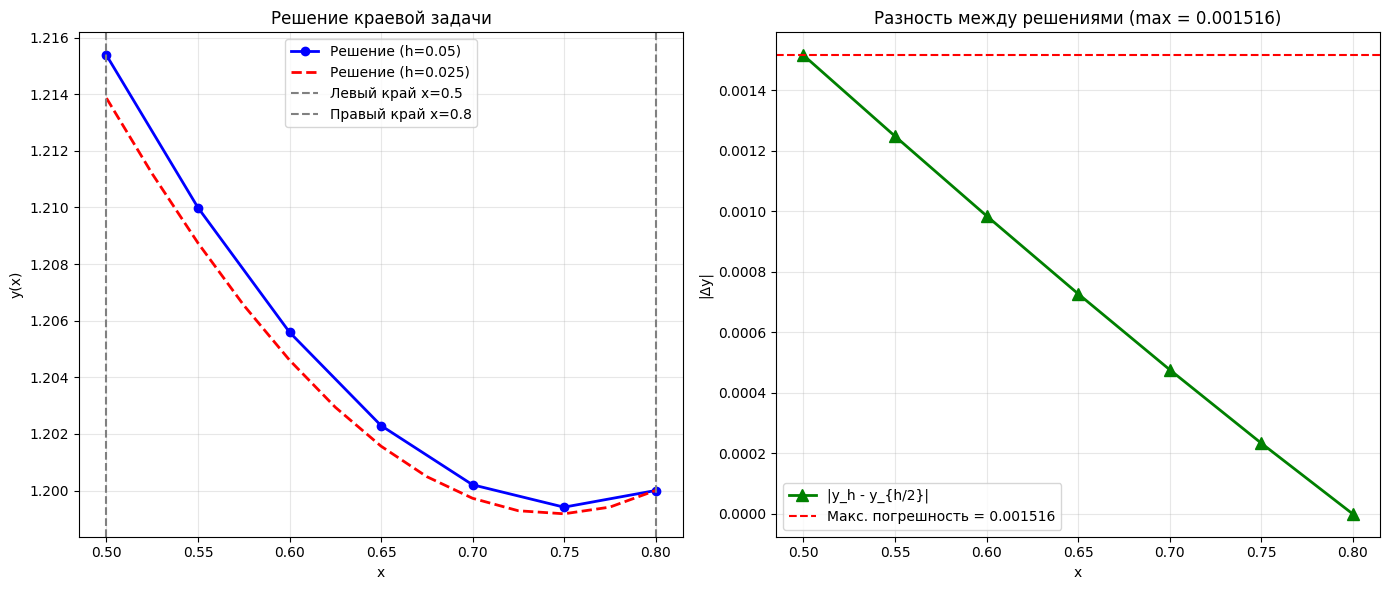

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def main():
    # Ввод данных с клавиатуры
    print("Введите дифференциальное уравнение в виде:")
    print("y'' + p(x)y' + q(x)y = f(x)")
    print("Пример: -3*x, 2, 1.5  для y'' - 3xy' + 2y = 1.5")
    
    p_str = input("p(x) = ") or "x"
    q_str = input("q(x) = ") or "1"
    f_str = input("f(x) = ") or "x + 1"
    
    # Создаем функции из введенных выражений
    def p(x):
        return eval(p_str, {"x": x, "np": np, "math": np})
    
    def q(x):
        return eval(q_str, {"x": x, "np": np, "math": np})
    
    def f_func(x):
        return eval(f_str, {"x": x, "np": np, "math": np})
    
    print("\nВведите краевые условия:")
    print("Формат: a0*y(a) + a1*y'(a) = A")
    a0_left = float(input("a0 (левый край) = ") or 1.0)
    a1_left = float(input("a1 (левый край) = ") or 2.0)
    A = float(input("A (левый край) = ") or 1.0)
    a = float(input("a (левый x) = ") or 0.5)
    
    print("\nФормат: b0*y(b) + b1*y'(b) = B")
    b0_right = float(input("b0 (правый край) = ") or 0.0)
    b1_right = float(input("b1 (правый край) = ") or 1.0)
    B = float(input("B (правый край) = ") or 1.2)
    b = float(input("b (правый x) = ") or 0.8)
    
    h = float(input("\nШаг h = ") or 0.05)
    
    # Метод конечных разностей
    def finite_difference_method(a, b, h, p, q, f_func, a0_left, a1_left, A, b0_right, b1_right, B):
        # Создаем сетку
        n = int((b - a) / h) + 1
        x = np.linspace(a, b, n)
        
        # Создаем матрицу системы и правую часть
        A_matrix = np.zeros((n, n))
        b_vector = np.zeros(n)
        
        # Левое краевое условие
        if abs(a1_left) > 1e-10:
            # Используем одностороннюю разность для производной (1-го порядка)
            A_matrix[0, 0] = a0_left - a1_left / h
            A_matrix[0, 1] = a1_left / h
        else:
            A_matrix[0, 0] = a0_left
        b_vector[0] = A
        
        # Правые краевые условия
        if abs(b1_right) > 1e-10:
            # Используем одностороннюю разность для производной
            A_matrix[-1, -2] = -b1_right / h
            A_matrix[-1, -1] = b0_right + b1_right / h
        else:
            A_matrix[-1, -1] = b0_right
        b_vector[-1] = B
        
        # Внутренние точки
        for i in range(1, n-1):
            # Конечно-разностные аппроксимации
            A_matrix[i, i-1] = 1/h**2 - p(x[i])/(2*h)
            A_matrix[i, i] = -2/h**2 + q(x[i])
            A_matrix[i, i+1] = 1/h**2 + p(x[i])/(2*h)
            b_vector[i] = f_func(x[i])
        
        # Решаем систему
        y = np.linalg.solve(A_matrix, b_vector)
        
        return x, y, A_matrix, b_vector
    
    # Решение с разными шагами для оценки точности
    def solve_with_different_steps(a, b, p, q, f_func, a0_left, a1_left, A, b0_right, b1_right, B):
        steps = [h, h/2]  # Основной шаг и вдвое меньший
        results = {}
        
        for step in steps:
            x, y, _, _ = finite_difference_method(a, b, step, p, q, f_func, a0_left, a1_left, A, b0_right, b1_right, B)
            results[step] = (x, y)
        
        return results
    
    # Получаем решения
    results = solve_with_different_steps(a, b, p, q, f_func, a0_left, a1_left, A, b0_right, b1_right, B)
    
    # Вывод результатов для основного шага
    h_coarse = h
    h_fine = h/2
    x_coarse, y_coarse = results[h_coarse]
    x_fine, y_fine = results[h_fine]
    
    print("\n" + "=" * 80)
    print(f"Таблица 4.1 – Решение задачи с шагом h = {h_coarse}")
    print("=" * 80)
    print(f"{'i':<3} {'x_i':<10} {'y_i':<15}")
    print("-" * 30)
    
    for i, (x, y) in enumerate(zip(x_coarse, y_coarse)):
        print(f"{i:<3} {x:<10.4f} {y:<15.6f}")
    
    # Вывод результатов для меньшего шага
    print("\n" + "=" * 80)
    print(f"Таблица 4.2 – Решение задачи с шагом h = {h_fine}")
    print("=" * 80)
    print(f"{'i':<3} {'x_i':<10} {'y_i':<15}")
    print("-" * 30)
    
    for i, (x, y) in enumerate(zip(x_fine, y_fine)):
        print(f"{i:<3} {x:<10.4f} {y:<15.6f}")
    
    # Сравнение результатов
    print("\n" + "=" * 80)
    print("Таблица 4.3 – Сравнение результатов")
    print("=" * 80)
    print(f"{'x_i':<10} {'y(h)':<15} {'y(h/2)':<15} {'|Δy|':<15}")
    print("-" * 55)
    
    errors = []
    for xi in x_coarse:
        y_coarse_val = np.interp(xi, x_coarse, y_coarse)
        y_fine_val = np.interp(xi, x_fine, y_fine)
        error = abs(y_coarse_val - y_fine_val)
        errors.append(error)
        print(f"{xi:<10.4f} {y_coarse_val:<15.6f} {y_fine_val:<15.6f} {error:<15.6f}")
    
    max_error = max(errors)
    print("-" * 55)
    print(f"Максимальная погрешность: |Δy|_max = {max_error:.6f}")
    print(f"Точность ε ≥ {max_error:.6f}")
    
    # Дополнительно: вывод матрицы системы для основного шага
    _, _, A_matrix, b_vector = finite_difference_method(a, b, h_coarse, p, q, f_func, a0_left, a1_left, A, b0_right, b1_right, B)
    
    print("\n" + "=" * 80)
    print("Матрица системы и правая часть (первые 5 строк):")
    print("=" * 80)
    for i in range(min(5, len(A_matrix))):  # Выводим первые 5 строк
        row_str = " ".join([f"{val:8.3f}" for val in A_matrix[i]])
        print(f"Строка {i}: {row_str} | {b_vector[i]:8.3f}")

    # --- ПОСТРОЕНИЕ ГРАФИКОВ ---
    plt.figure(figsize=(14, 6))

    # График 1: Решения
    plt.subplot(1, 2, 1)
    plt.plot(x_coarse, y_coarse, 'bo-', label=f'Решение (h={h_coarse})', linewidth=2, markersize=6)
    plt.plot(x_fine, y_fine, 'r--', label=f'Решение (h={h_fine})', linewidth=2)
    plt.xlabel('x')
    plt.ylabel('y(x)')
    plt.title('Решение краевой задачи')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.axvline(x=a, color='gray', linestyle='--', label=f'Левый край x={a}')
    plt.axvline(x=b, color='gray', linestyle='--', label=f'Правый край x={b}')
    plt.legend()

    # График 2: Разность решений
    plt.subplot(1, 2, 2)
    plt.plot(x_coarse, errors, 'g^-', linewidth=2, markersize=8, label='|y_h - y_{h/2}|')
    plt.xlabel('x')
    plt.ylabel('|Δy|')
    plt.title(f'Разность между решениями (max = {max_error:.6f})')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.axhline(y=max_error, color='red', linestyle='--', label=f'Макс. погрешность = {max_error:.6f}')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

Лабораторная работа № 5. Решение краевой задачи для ОДУ методами коллокаций, наименьших квадратов, Галеркина

Метод Галёркина для y''(x) = f(x), y(a)=y(b)=0 на [a,b]

Таблица решений:
+-----+-------+---------+
|   k |   x_k |     y_k |
+=====+=======+=========+
|   0 |   1   |  0      |
+-----+-------+---------+
|   1 |   1.1 | -0.2283 |
+-----+-------+---------+
|   2 |   1.2 | -0.4489 |
+-----+-------+---------+
|   3 |   1.3 | -0.6551 |
+-----+-------+---------+
|   4 |   1.4 | -0.8418 |
+-----+-------+---------+
|   5 |   1.5 | -1.0062 |
+-----+-------+---------+
|   6 |   1.6 | -1.1474 |
+-----+-------+---------+
|   7 |   1.7 | -1.266  |
+-----+-------+---------+
|   8 |   1.8 | -1.3628 |
+-----+-------+---------+
|   9 |   1.9 | -1.4381 |
+-----+-------+---------+
|  10 |   2   | -1.4907 |
+-----+-------+---------+
|  11 |   2.1 | -1.5178 |
+-----+-------+---------+
|  12 |   2.2 | -1.5144 |
+-----+-------+---------+
|  13 |   2.3 | -1.4747 |
+-----+-------+---------+
|  14 |   2.4 | -1.3928 |
+-----+-------+---------+
|  15 |   2.5 | -1.2642 |
+-----+-------+---------+
|  16 |   2.6 | 

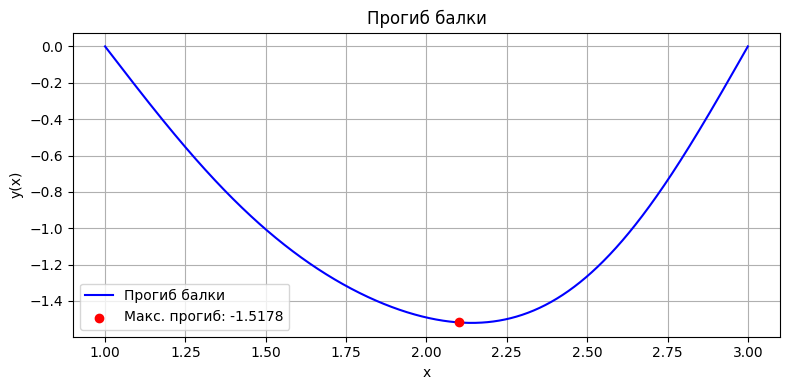

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from sympy import symbols, sin, sympify, integrate, lambdify

# a: 0
# b: 1
# f(x): 3 + 2*x
# количество базисных функций: 3
# количество узлов сетки: 11

# a: 1
# b: 3
# f(x): 2*x-1
# количество базисных функций: 3
# количество узлов сетки: 21


def galerkin_coeffs(N, a, b, f_expr_str):
    x = symbols('x')
    L = b - a
    f = sympify(f_expr_str, locals={'x': x})
    coeffs = []

    for n in range(1, N + 1):
        phi_n_sym = sin(n * np.pi * (x - a) / L)  
        integral = integrate(f * phi_n_sym, (x, a, b))
        a_n = -(2 * L / (n**2 * np.pi**2)) * integral
        coeffs.append(float(a_n))
    return np.array(coeffs)

def y_approx(x_vals, a, b, coeffs):
    L = b - a
    pi = np.pi
    x_vals = np.asarray(x_vals)
    y_vals = np.zeros_like(x_vals, dtype=float)

    # Быстрый векторный расчёт
    N = len(coeffs)
    n = np.arange(1, N + 1).reshape(-1, 1)              # (N,1)
    X = x_vals.reshape(1, -1)                            # (1,M)
    S = np.sin(n * pi * (X - a) / L)                     # (N,M)
    y_vals = (coeffs.reshape(-1, 1) * S).sum(axis=0)     # (M,)
    return y_vals

def main():
    print("Метод Галёркина для y''(x) = f(x), y(a)=y(b)=0 на [a,b]")
    # Ввод
    a = float(input("Введите левую границу области a: ").strip())
    b = float(input("Введите правую границу области b: ").strip())
    while b <= a:
        print("Ошибка: правая граница должна быть больше левой.")
        b = float(input("Введите правую границу области b: ").strip())

    f_expr = input("Введите выражение для f(x): ").strip()

    N = int(input("Введите количество базисных функций: ").strip())
    while N < 3:
        N = int(input("Ошибка: нужно не менее 3. Повторите ввод: ").strip())

    M = int(input("Введите количество узлов сетки: ").strip())
    while M < 2:
        M = int(input("Ошибка: минимум 2 узла. Повторите ввод: ").strip())

    # Сетка
    x_vals = np.linspace(a, b, M)

    # Решение
    coeffs = galerkin_coeffs(N, a, b, f_expr)
    y_vals = y_approx(x_vals, a, b, coeffs)

    # Таблица
    table_rows = []
    for k in range(M):
        table_rows.append([k, f"{x_vals[k]:.4f}", f"{y_vals[k]:.4f}"])

    print("\nТаблица решений:")
    print(tabulate(table_rows, headers=["k", "x_k", "y_k"], tablefmt="grid"))

    # Максимальный прогиб (минимум y)
    i_min = np.argmin(y_vals)
    x_min, y_min = x_vals[i_min], y_vals[i_min]
    print(f"\nМаксимальный прогиб: y_min = y({x_min:.4f}) = {y_min:.4f}")

    # График
    xx = np.linspace(a, b, 1001)
    yy = y_approx(xx, a, b, coeffs)

    plt.figure(figsize=(8, 4))
    plt.plot(xx, yy, color="blue", label="Прогиб балки")
    plt.scatter([x_min], [y_min], color="red", zorder=3, label=f"Макс. прогиб: {y_min:.4f}")
    plt.title("Прогиб балки")
    plt.xlabel("x")
    plt.ylabel("y(x)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


Лабораторная работа № 6. Решение задачи Дирихле для уравнения Пуассона методом сеток 


1. ПОСТРОЕНИЕ СЕТКИ:
   Размер области: [0, 2.0] x [0, 2.0]
   Шаг h = 0.5
   Количество узлов: nx = 5, ny = 5

2. ЗАДАНИЕ ГРАНИЧНЫХ УСЛОВИЙ φ(x, y) = 0 на границе L:
   - Нижняя граница (y=0): φ = 0
   - Левая граница (x=0): φ = 0
   - Верхняя граница (y=2.0): φ = 0
   - Правая граница (x=2.0):
        φ = 0 для y ∈ [0, 1]
        φ = Gθ * √(1 - (y-1)²) для y ∈ (1, 2]

3. ИТЕРАЦИОННЫЙ ПРОЦЕСС (метод простой итерации):
   Критерий сходимости: max|φ_new - φ_old| < ε = 0.1
   Максимальное число итераций: 10000
   Формула обновления для внутреннего узла (i,j):
        φ[i,j] = 0.25 * (φ[i+1,j] + φ[i-1,j] + φ[i,j+1] + φ[i,j-1] + h² * 2 * Gθ)
   (Применяется только внутри круга (x-2)² + (y-1)² <= 1)
   Сходимость достигнута на итерации 3. Макс. разность = 0.060266

4. РЕЗУЛЬТАТЫ:
   Решение сошлось за 3 итераций.
   Минимальное значение φ: 0.000000
   Максимальное значение φ: 1.732051

6. ПОСТРОЕНИЕ СИСТЕМЫ ЛИНЕЙНЫХ УРАВНЕНИЙ (для h=0.5):
   Для внутренних узлов используется шаблон 'крест'

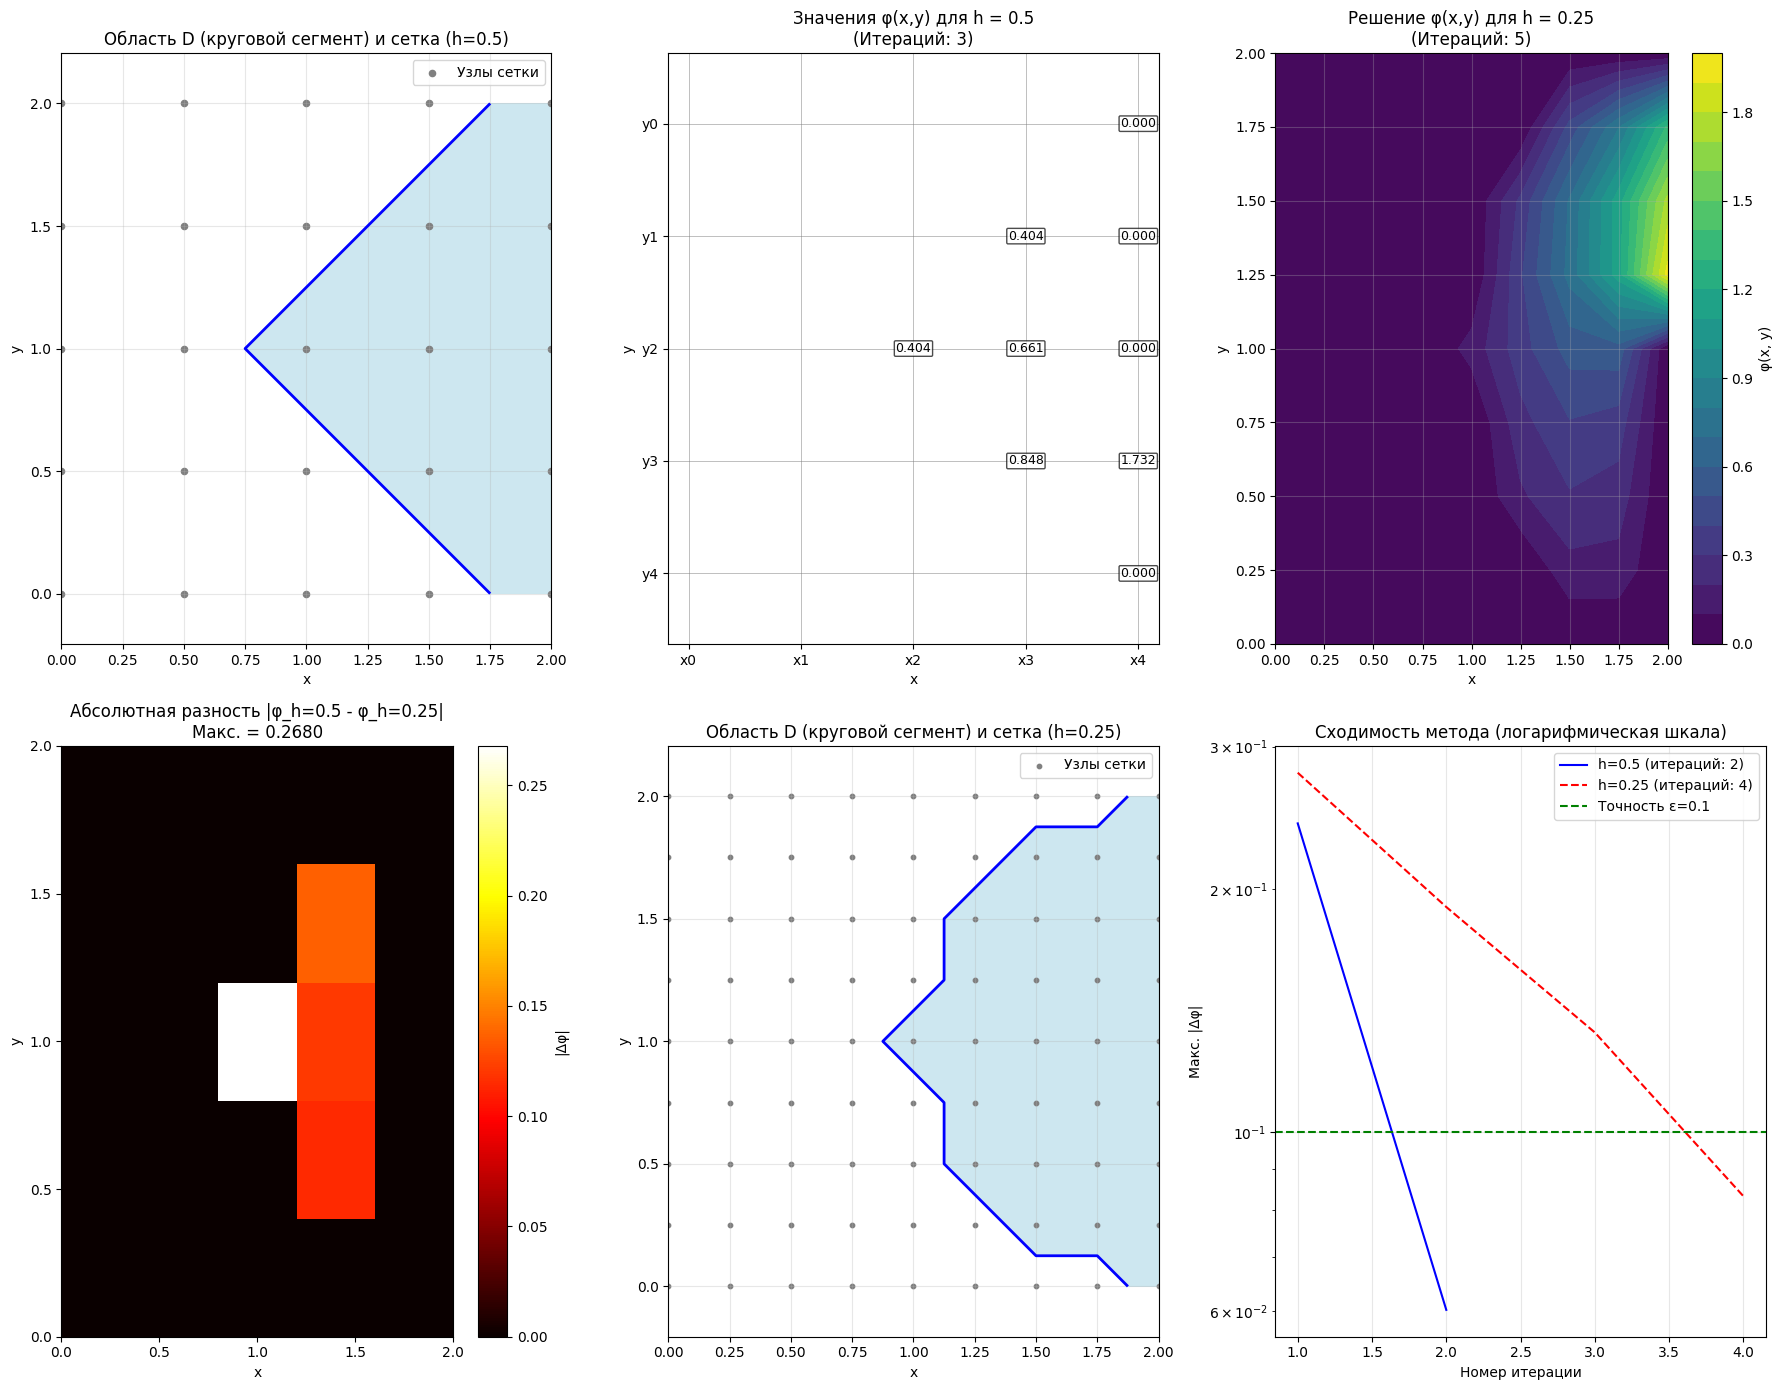

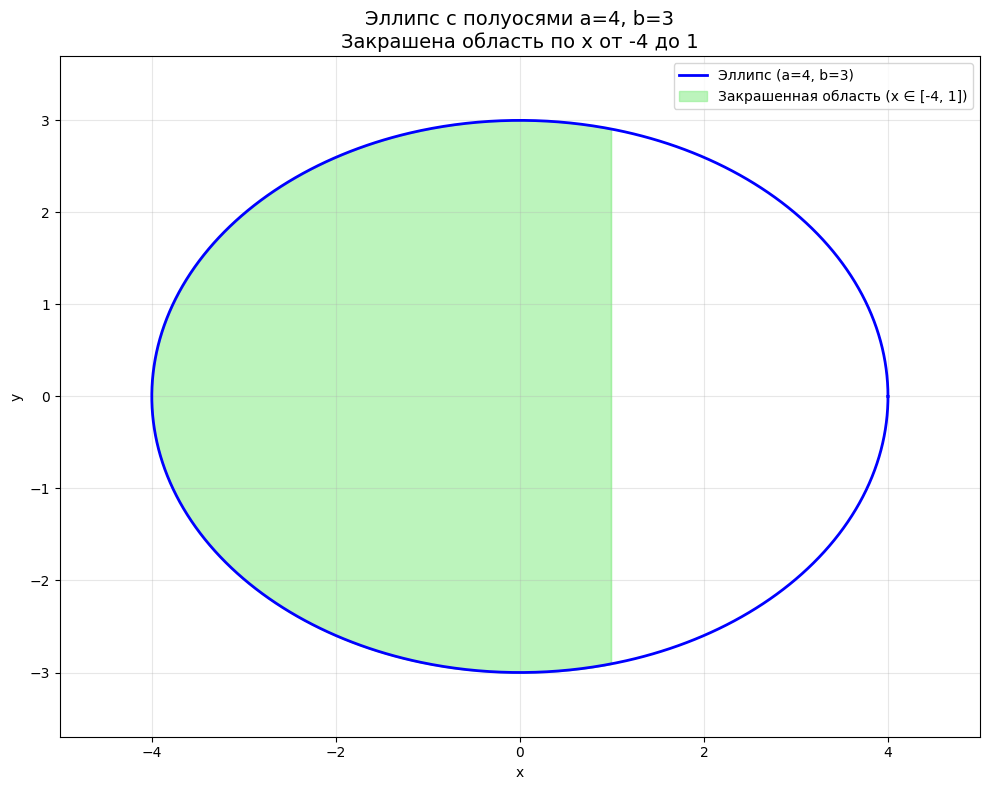


Количество итераций:
   - Для h = 0.5: 3 итераций
   - Для h = 0.25: 5 итераций
   Вывод: Уменьшение шага привело к увеличению числа итераций, что ожидаемо из-за роста числа узлов.

Точность решения:
   - Максимальная абсолютная разность в общих узлах: 0.267951
   - Средняя абсолютная разность в общих узлах: 0.025561
   Вывод: Разность превышает заданную точность ε=0.1. Необходимо использовать меньший шаг (h=0.25 или меньше).

Экстремальные значения:
   - Для h=0.5: φ ∈ [0.0000, 1.7321]
   - Для h=0.25: φ ∈ [0.0000, 1.9365]

   Значения функции φ(x,y) в узлах сетки (h=0.5) — аналог рис. 6.6:
      x:   0.0   0.5   1.0   1.5   2.0 
y= 2.0:      -      -      -      - 0.000 
y= 1.5:      -      -      - 0.848 1.732 
y= 1.0:      -      - 0.404 0.661 0.000 
y= 0.5:      -      -      - 0.404 0.000 
y= 0.0:      -      -      -      - 0.000 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def find_internal_nodes_for_circle(X, Y, center_x=2.0, center_y=1.0, radius=1.0):
    """
    Находит индексы внутренних узлов, лежащих внутри круга (x-2)^2 + (y-1)^2 <= 1.
    Возвращает список кортежей (i, j) и словарь node_to_index для нумерации.
    """
    ny, nx = X.shape
    internal_nodes = []
    for j in range(1, ny-1):  # исключаем граничные строки
        for i in range(1, nx-1):  # исключаем граничные столбцы
            if (X[j, i] - center_x)**2 + (Y[j, i] - center_y)**2 <= radius**2:
                internal_nodes.append((i, j))
    
    # Создаем словарь: (i, j) -> глобальный индекс
    node_to_index = {node: idx for idx, node in enumerate(internal_nodes)}
    return internal_nodes, node_to_index


def build_system_matrix(h, G_theta, X, Y, center_x=2.0, center_y=1.0, radius=1.0):
    """
    Строит матрицу A и вектор b для системы A * Phi = b.
    Узлы нумеруются только среди внутренних точек круга.
    Выводит матрицу в формате, как в методичке (стр. 27-28).
    """
    print(f"\n6. ПОСТРОЕНИЕ СИСТЕМЫ ЛИНЕЙНЫХ УРАВНЕНИЙ (для h={h}):")
    print("   Для внутренних узлов используется шаблон 'крест':")
    print("        φ[i,j] = 1/4 * (φ[i+1,j] + φ[i-1,j] + φ[i,j+1] + φ[i,j-1] + h² * 2 * Gθ)")
    print("   Переносим φ[i,j] в левую часть:")
    print("        -4φ[i,j] + φ[i+1,j] + φ[i-1,j] + φ[i,j+1] + φ[i,j-1] = -h² * 2 * Gθ")
    print("   Или, для удобства:")
    print("        φ[i,j] = 1/4 * (φ[i+1,j] + φ[i-1,j] + φ[i,j+1] + φ[i,j-1]) + (h² * Gθ / 2)")

    # Находим внутренние узлы
    internal_nodes, node_to_index = find_internal_nodes_for_circle(X, Y, center_x, center_y, radius)
    n = len(internal_nodes)
    
    if n == 0:
        print("   Внутренних узлов не найдено.")
        return None, None, None

    A = np.zeros((n, n))
    b = np.full(n, (h**2 * G_theta) / 2)  # Правая часть: h² * Gθ / 2

    # Заполняем матрицу A
    for idx, (i, j) in enumerate(internal_nodes):
        A[idx, idx] = 1.0  # Диагональный элемент

        # Проверяем соседей: право (i+1, j)
        if (i+1, j) in node_to_index:
            A[idx, node_to_index[(i+1, j)]] = -0.25
        # else: граничное условие, его значение уже учтено в phi, поэтому в b ничего не добавляем

        # Лево (i-1, j)
        if (i-1, j) in node_to_index:
            A[idx, node_to_index[(i-1, j)]] = -0.25

        # Верх (i, j+1)
        if (i, j+1) in node_to_index:
            A[idx, node_to_index[(i, j+1)]] = -0.25

        # Низ (i, j-1)
        if (i, j-1) in node_to_index:
            A[idx, node_to_index[(i, j-1)]] = -0.25

    print(f"\n   Матрица коэффициентов A (размер {n}x{n}):")
    for i in range(n):
        row_str = " ".join([f"{A[i, j]:6.3f}" for j in range(n)])
        print(f"   Строка {i}: {row_str} | b[{i}] = {b[i]:.3f}")

    return A, b, node_to_index


def solve_poisson_detailed(h, epsilon, G_theta, variant_info=""):

    # Параметры области: прямоугольник [0, 2] x [0, 2], внутри круг (x-2)^2 + (y-1)^2 <= 1
    center_x, center_y = 2.0, 1.0
    radius = 1.0
    Lx, Ly = 2.0, 2.0
    nx = int(Lx / h) + 1
    ny = int(Ly / h) + 1
    x = np.linspace(0, Lx, nx)
    y = np.linspace(0, Ly, ny)
    X, Y = np.meshgrid(x, y)

    # Инициализация решения
    phi = np.zeros((ny, nx))

    print(f"\n1. ПОСТРОЕНИЕ СЕТКИ:")
    print(f"   Размер области: [{0}, {Lx}] x [{0}, {Ly}]")
    print(f"   Шаг h = {h}")
    print(f"   Количество узлов: nx = {nx}, ny = {ny}")

    # --- Задание граничных условий ---
    print(f"\n2. ЗАДАНИЕ ГРАНИЧНЫХ УСЛОВИЙ φ(x, y) = 0 на границе L:")
    # Нижняя граница (y=0)
    phi[0, :] = 0.0
    print(f"   - Нижняя граница (y=0): φ = 0")

    # Левая граница (x=0)
    phi[:, 0] = 0.0
    print(f"   - Левая граница (x=0): φ = 0")

    # Верхняя граница (y=2)
    phi[-1, :] = 0.0
    print(f"   - Верхняя граница (y={Ly}): φ = 0")

    # Правая граница (x=2): φ = 0 для y ∈ [0,1], φ = Gθ * sqrt(1 - (y-1)**2) для y ∈ (1,2]
    for j in range(ny):
        if y[j] <= 1.0:
            phi[j, -1] = 0.0
        else:
            phi[j, -1] = G_theta * np.sqrt(1.0 - (y[j] - 1.0)**2)
    print(f"   - Правая граница (x={Lx}):")
    print(f"        φ = 0 для y ∈ [0, 1]")
    print(f"        φ = Gθ * √(1 - (y-1)²) для y ∈ (1, 2]")

    # --- Внутренние узлы: итерационный процесс ---
    print(f"\n3. ИТЕРАЦИОННЫЙ ПРОЦЕСС (метод простой итерации):")
    print(f"   Критерий сходимости: max|φ_new - φ_old| < ε = {epsilon}")
    print(f"   Максимальное число итераций: 10000")
    print(f"   Формула обновления для внутреннего узла (i,j):")
    print(f"        φ[i,j] = 0.25 * (φ[i+1,j] + φ[i-1,j] + φ[i,j+1] + φ[i,j-1] + h² * 2 * Gθ)")
    print(f"   (Применяется только внутри круга (x-2)² + (y-1)² <= 1)")

    max_iter = 10000
    iteration_data = []

    for it in range(max_iter):
        phi_old = phi.copy()
        # Обновление внутренних узлов
        for i in range(1, nx-1):
            for j in range(1, ny-1):
                # Проверка, находится ли узел внутри области D (круга)
                if (X[j, i] - center_x)**2 + (Y[j, i] - center_y)**2 <= radius**2:
                    phi[j, i] = 0.25 * (
                        phi[j, i+1] + phi[j, i-1] +
                        phi[j+1, i] + phi[j-1, i] +
                        h**2 * 2.0 * G_theta
                    )

        iteration_data.append(phi.copy())

        # Проверка сходимости
        diff = np.max(np.abs(phi - phi_old))
        if diff < epsilon:
            print(f"   Сходимость достигнута на итерации {it+1}. Макс. разность = {diff:.6f}")
            break

        # Вывод прогресса каждые 100 итераций
        if (it + 1) % 100 == 0:
            print(f"   Итерация {it+1}: max|Δφ| = {diff:.6f}")

    if it == max_iter - 1:
        print(f"   Предупреждение: Достигнуто максимальное число итераций ({max_iter}). Точность {epsilon} не достигнута.")

    print(f"\n4. РЕЗУЛЬТАТЫ:")
    print(f"   Решение сошлось за {it+1} итераций.")
    print(f"   Минимальное значение φ: {np.min(phi):.6f}")
    print(f"   Максимальное значение φ: {np.max(phi):.6f}")

    return X, Y, phi, it+1, iteration_data, y, nx, x

def create_comparison_table(phi1, phi2, h1, h2):
    """Создает таблицу сравнения значений φ в общих узлах сеток с шагами h1 и h2."""
    print(f"\n5. СРАВНЕНИЕ РЕШЕНИЙ В ОБЩИХ УЗЛАХ (h={h1} и h={h2}):")
    nx1 = phi1.shape[1]
    ny1 = phi1.shape[0]
    ratio = int(h1 / h2)  # Соотношение шагов

    data = []
    for j in range(ny1):
        for i in range(nx1):
            val1 = phi1[j, i]
            val2 = phi2[j * ratio, i * ratio]
            abs_diff = abs(val1 - val2)
            data.append([i * h1, j * h1, val1, val2, abs_diff])

    df = pd.DataFrame(data, columns=['x', 'y', f'φ (h={h1})', f'φ (h={h2})', 'Абс. Разность'])
    print(df.to_string(index=False, float_format="{:,.4f}".format))

    max_diff = df['Абс. Разность'].max()
    avg_diff = df['Абс. Разность'].mean()
    print(f"\n   Максимальная абсолютная разность: {max_diff:.6f}")
    print(f"   Средняя абсолютная разность: {avg_diff:.6f}")

    return df, max_diff, avg_diff


# --- ОСНОВНОЕ ВЫПОЛНЕНИЕ ---

G_theta = 2.0  # Параметр для варианта 4
epsilon = 0.1

# --- Решение с шагом h = 0.5 ---
X1, Y1, phi1, iter1, iteration_data1, y1, nx1, x1 = solve_poisson_detailed(0.5, epsilon, G_theta, "h=0.5")

# --- Построение матрицы системы (для h=0.5) ---
A, b, node_to_index = build_system_matrix(0.5, G_theta, X1, Y1)

# --- Решение с шагом h = 0.25 ---
X2, Y2, phi2, iter2, iteration_data2, y2, nx2, x2 = solve_poisson_detailed(0.25, epsilon, G_theta, "h=0.25")

# --- Сравнение решений ---
comparison_df, max_diff, avg_diff = create_comparison_table(phi1, phi2, 0.5, 0.25)

print(f"\nПроверка граничных условий (для h=0.25):")
boundary_error = max(
    np.max(np.abs(phi2[0, :])),           # y=0
    np.max(np.abs(phi2[:, 0])),           # x=0
    np.max(np.abs(phi2[:, -1][y2 <= 1.0])),  # x=2, y∈[0,1]
    np.max(np.abs(phi2[-1, :]))           # y=2
)
print(f"   Максимальная ошибка на границах: {boundary_error:.6f}")

# --- ВИЗУАЛИЗАЦИЯ ---
plt.figure(figsize=(18, 14))

# График 1: Область D (круговой сегмент) и сетка (h=0.5)
plt.subplot(2, 3, 1)
# Создаем маску для области D (круг)
mask1 = (X1 - 2.0)**2 + (Y1 - 1.0)**2 <= 1.0
plt.contourf(X1, Y1, mask1.astype(int), levels=[-0.5, 0.5, 1.5], colors=['white', 'lightblue'], alpha=0.6)
plt.contour(X1, Y1, mask1.astype(int), levels=[0.5], colors='blue', linewidths=2)
plt.scatter(X1, Y1, color='gray', s=20, marker='o', label='Узлы сетки')
plt.title('Область D (круговой сегмент) и сетка (h=0.5)', fontsize=12)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.xlim(0, 2)
plt.ylim(0, 2)

# График 2: Решение для h = 0.5
plt.subplot(2, 3, 2)
plt.gca().invert_yaxis()  # Инвертируем ось Y
for xi in np.arange(0, 2.1, 0.5):
    plt.axvline(xi, color='gray', linestyle='-', linewidth=0.5, alpha=0.7)
for yi in np.arange(0, 2.1, 0.5):
    plt.axhline(yi, color='gray', linestyle='-', linewidth=0.5, alpha=0.7)

# Подписываем узлы
for i in range(phi1.shape[1]):
    for j in range(phi1.shape[0]):
        if (X1[j, i] - 2.0)**2 + (Y1[j, i] - 1.0)**2 <= 1.0:  # Только внутри круга
            plt.text(i*0.5, j*0.5, f"{phi1[j, i]:.3f}", ha='center', va='center', fontsize=9,
                     bbox=dict(boxstyle="round,pad=0.1", facecolor='w', alpha=0.7))

# Подписываем оси
plt.yticks(np.arange(0, 2.1, 0.5), [f'y{i}' for i in range(5)])
plt.xticks(np.arange(0, 2.1, 0.5), [f'x{i}' for i in range(5)])
plt.title(f'Значения φ(x,y) для h = 0.5\n(Итераций: {iter1})', fontsize=12)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(False)
plt.axis('equal')

# График 3: Решение для h = 0.25 (контурный график)
plt.subplot(2, 3, 3)
contour = plt.contourf(X2, Y2, phi2, levels=20, cmap='viridis')
plt.colorbar(contour, label='φ(x, y)')
plt.title(f'Решение φ(x,y) для h = 0.25\n(Итераций: {iter2})', fontsize=12)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, alpha=0.3)

# График 4: Разность решений в общих узлах
plt.subplot(2, 3, 4)
nx1 = phi1.shape[1]
ny1 = phi1.shape[0]
X_common = np.linspace(0, 2, nx1)
Y_common = np.linspace(0, 2, ny1)
X_common, Y_common = np.meshgrid(X_common, Y_common)
Z_diff = np.zeros_like(phi1)

for j in range(ny1):
    for i in range(nx1):
        Z_diff[j, i] = abs(phi1[j, i] - phi2[j*2, i*2])  # h2 = h1/2 => индекс *2

im = plt.imshow(Z_diff, extent=[0, 2, 0, 2], origin='lower', cmap='hot', aspect='auto')
plt.colorbar(im, label='|Δφ|')
plt.title(f'Абсолютная разность |φ_h=0.5 - φ_h=0.25|\nМакс. = {max_diff:.4f}', fontsize=12)
plt.xlabel('x')
plt.ylabel('y')
plt.xticks(np.arange(0, 2.1, 0.5))
plt.yticks(np.arange(0, 2.1, 0.5))

# График 5: Область D (круговой сегмент) и сетка (h=0.25)
plt.subplot(2, 3, 5)
mask2 = (X2 - 2.0)**2 + (Y2 - 1.0)**2 <= 1.0
plt.contourf(X2, Y2, mask2.astype(int), levels=[-0.5, 0.5, 1.5], colors=['white', 'lightblue'], alpha=0.6)
plt.contour(X2, Y2, mask2.astype(int), levels=[0.5], colors='blue', linewidths=2)
plt.scatter(X2, Y2, color='gray', s=10, marker='o', label='Узлы сетки')
plt.title('Область D (круговой сегмент) и сетка (h=0.25)', fontsize=12)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.xlim(0, 2)
plt.ylim(0, 2)

# График 6: Сходимость (макс. изменение на итерации)
plt.subplot(2, 3, 6)
# Для h=0.5
diffs_h1 = []
phi_prev = iteration_data1[0]
for phi_next in iteration_data1[1:]:
    diff = np.max(np.abs(phi_next - phi_prev))
    diffs_h1.append(diff)
    phi_prev = phi_next

# Для h=0.25
diffs_h2 = []
phi_prev = iteration_data2[0]
for phi_next in iteration_data2[1:]:
    diff = np.max(np.abs(phi_next - phi_prev))
    diffs_h2.append(diff)
    phi_prev = phi_next

plt.semilogy(range(1, len(diffs_h1)+1), diffs_h1, 'b-', label=f'h=0.5 (итераций: {len(diffs_h1)})')
plt.semilogy(range(1, len(diffs_h2)+1), diffs_h2, 'r--', label=f'h=0.25 (итераций: {len(diffs_h2)})')
plt.axhline(y=epsilon, color='green', linestyle='--', label=f'Точность ε={epsilon}')
plt.xlabel('Номер итерации')
plt.ylabel('Макс. |Δφ|')
plt.title('Сходимость метода (логарифмическая шкала)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# --- ОТРИСОВКА ЭЛЛИПСА ---
plt.figure(figsize=(10, 8))

# Параметры эллипса
a = 4  # большая полуось
b = 3  # малая полуось

# Генерация точек эллипса
theta = np.linspace(0, 2 * np.pi, 1000)
x_ellipse = a * np.cos(theta)
y_ellipse = b * np.sin(theta)

# Рисуем полный эллипс (контур)
plt.plot(x_ellipse, y_ellipse, 'b-', linewidth=2, label='Эллипс (a=4, b=3)')

# Создаем маску для закрашивания части эллипса, где x от -4 до 1
mask_fill = (x_ellipse >= -4) & (x_ellipse <= 1)

# Закрашиваем нужную часть
plt.fill_between(x_ellipse[mask_fill], y_ellipse[mask_fill], -y_ellipse[mask_fill], color='lightgreen', alpha=0.6, label='Закрашенная область (x ∈ [-4, 1])')

# Настройки графика
plt.title('Эллипс с полуосями a=4, b=3\nЗакрашена область по x от -4 до 1', fontsize=14)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.xlim(-5, 5)
plt.ylim(-4, 4)

plt.tight_layout()
plt.show()

# --- ИТОГОВЫЙ АНАЛИЗ И ВЫВОДЫ ---
print(f"\nКоличество итераций:")
print(f"   - Для h = 0.5: {iter1} итераций")
print(f"   - Для h = 0.25: {iter2} итераций")
print("   Вывод: Уменьшение шага привело к увеличению числа итераций, что ожидаемо из-за роста числа узлов.")

print(f"\nТочность решения:")
print(f"   - Максимальная абсолютная разность в общих узлах: {max_diff:.6f}")
print(f"   - Средняя абсолютная разность в общих узлах: {avg_diff:.6f}")
if max_diff < epsilon:
    print(f"   Вывод: Разность меньше заданной точности ε={epsilon}. Результат с h=0.5 приемлем.")
else:
    print(f"   Вывод: Разность превышает заданную точность ε={epsilon}. Необходимо использовать меньший шаг (h=0.25 или меньше).")

print(f"\nЭкстремальные значения:")
phi1_min, phi1_max = np.min(phi1), np.max(phi1)
phi2_min, phi2_max = np.min(phi2), np.max(phi2)
print(f"   - Для h=0.5: φ ∈ [{phi1_min:.4f}, {phi1_max:.4f}]")
print(f"   - Для h=0.25: φ ∈ [{phi2_min:.4f}, {phi2_max:.4f}]")

print(f"\n   Значения функции φ(x,y) в узлах сетки (h=0.5) — аналог рис. 6.6:")
print("      x: ", end="")
for i in range(nx1):
    print(f"{x1[i]:5.1f} ", end="")
print()
for j in range(len(y1)-1, -1, -1):
    print(f"y={y1[j]:4.1f}: ", end="")
    for i in range(nx1):
        if (X1[j, i] - 2.0)**2 + (Y1[j, i] - 1.0)**2 <= 1.0:
            print(f"{phi1[j, i]:5.3f} ", end="")
        else:
            print("     - ", end="")
    print()


Лабораторная работа № 7. Решение задачи кручения стержня методом конечных элементов

РЕШЕНИЕ ЗАДАЧИ КРУЧЕНИЯ ЭЛЛИПСА МЕТОДОМ КОНЕЧНЫХ ЭЛЕМЕНТОВ
Параметр Gθ = 2.0
Эллипс: a = 4.0, b = 3.0
Закрашенная область: x ∈ [-4.0, 1.0]

1. ГЕНЕРАЦИЯ УЗЛОВ СЕТКИ:
   Узлов на эллипсе: 16
   Узлов на прямой x=1.0: 6
   Внутренних узлов: 6
   Всего узлов: 28

   КООРДИНАТЫ УЗЛОВ:
   № узла |     x     |     y    
   -------|-----------|-----------
        1 |     0.000 |     3.000
        2 |    -0.832 |     2.934
        3 |    -1.627 |     2.741
        4 |    -2.351 |     2.427
        5 |    -2.973 |     2.007
        6 |    -3.464 |     1.500
        7 |    -3.804 |     0.927
        8 |    -3.978 |     0.314
        9 |    -3.978 |    -0.314
       10 |    -3.804 |    -0.927
       11 |    -3.464 |    -1.500
       12 |    -2.973 |    -2.007
       13 |    -2.351 |    -2.427
       14 |    -1.627 |    -2.741
       15 |    -0.832 |    -2.934
       16 |    -0.000 |    -3.000
       17 |     1.000 |    -2.143
       18 |     1.000 |    -1.286
       19 |     1.000 |    -0.429
   

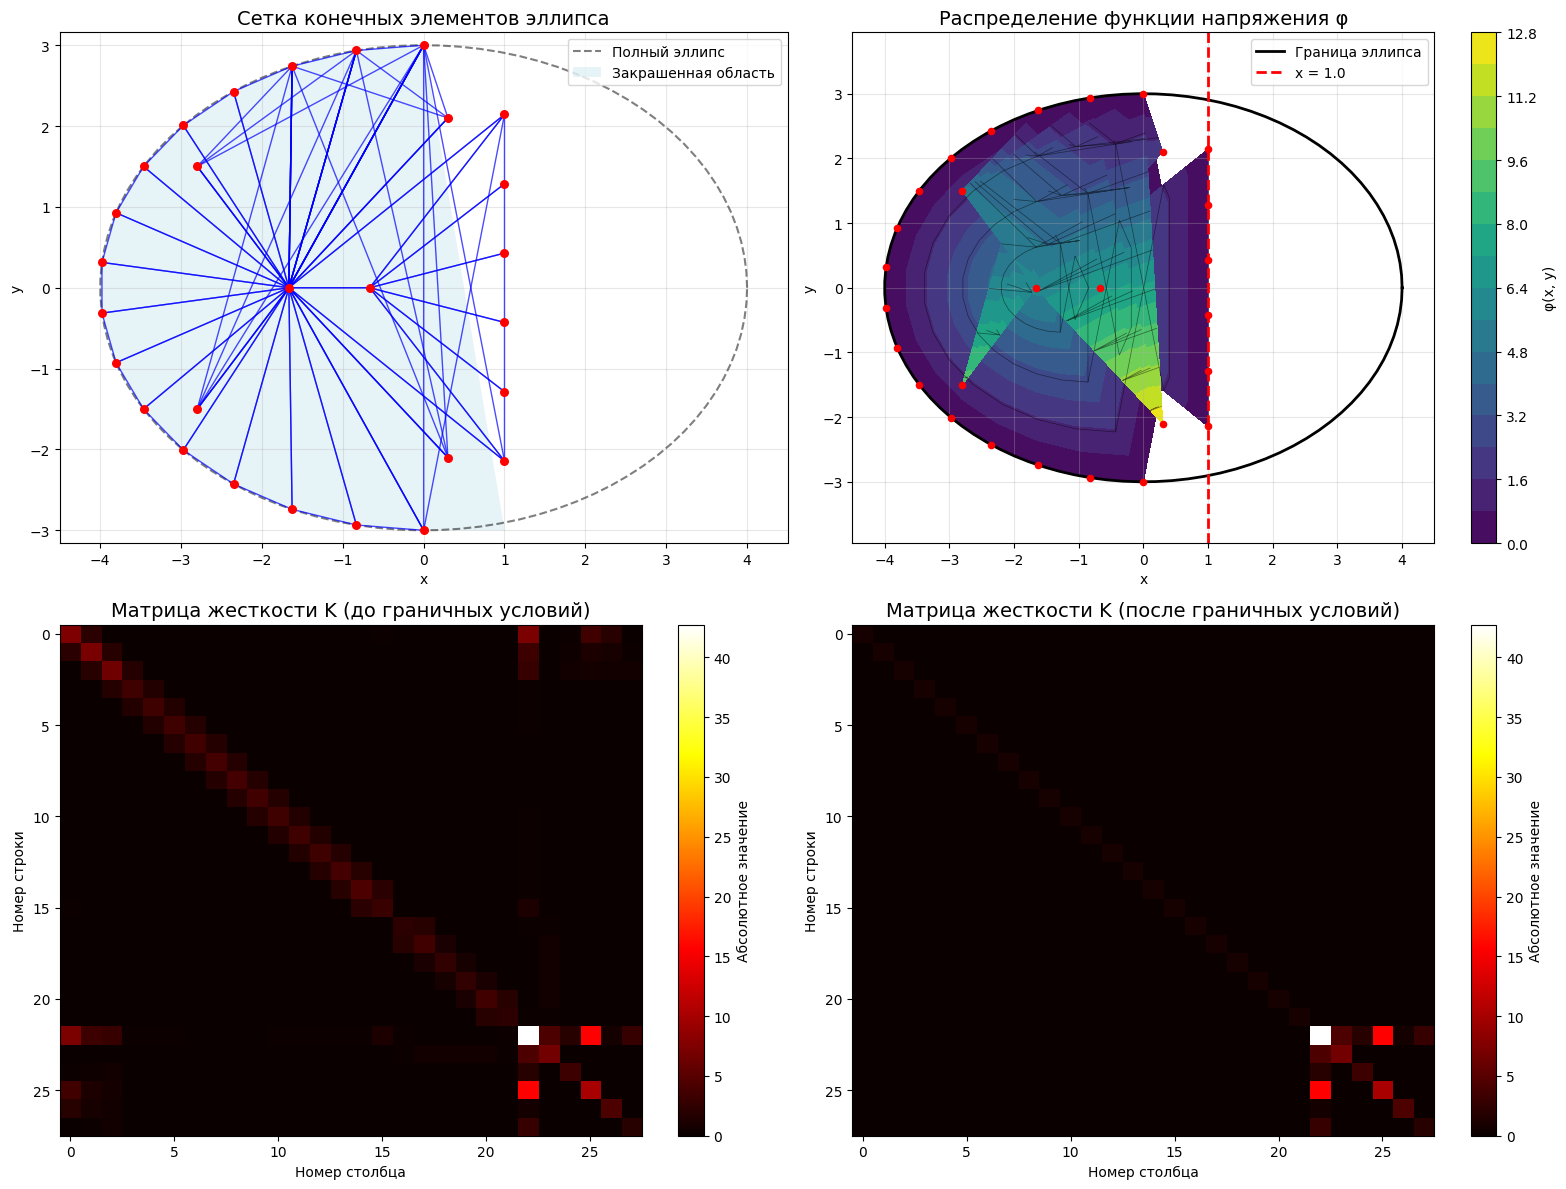


АНАЛИЗ МАТРИЦ
Свойства матрицы жесткости (до граничных условий):
   Размер: (28, 28)
   Норма: 56.755528
   Определитель: -1.615377e-03
   Число обусловленности: 3.119771e+17

Свойства матрицы жесткости (после граничных условий):
   Размер: (28, 28)
   Норма: 50.702043
   Определитель: 1.850405e+04
   Число обусловленности: 4.953073e+01

ИТОГОВЫЕ РЕЗУЛЬТАТЫ
Эллипс: a = 4.0, b = 3.0
Закрашенная область: x ∈ [-4.0, 1.0]
Параметр кручения: Gθ = 2.0
Крутящий момент: T = 780.936848
Количество узлов: 28
Количество элементов: 37

ЗНАЧЕНИЯ ФУНКЦИИ НАПРЯЖЕНИЯ В УЗЛАХ:
№ узла |     x     |     y     |    φ(x,y)    
-------|-----------|-----------|--------------
     1 |     0.000 |     3.000 |     0.000000
     2 |    -0.832 |     2.934 |     0.000000
     3 |    -1.627 |     2.741 |     0.000000
     4 |    -2.351 |     2.427 |     0.000000
     5 |    -2.973 |     2.007 |     0.000000
     6 |    -3.464 |     1.500 |     0.000000
     7 |    -3.804 |     0.927 |     0.000000
     8 |    -3.97

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def solve_torsion_ellipse_by_fem(G_theta, a=4.0, b=3.0, x_max=1.0, num_nodes_ellipse=16, num_nodes_straight=8, print_matrices=True):
    """
    Решает задачу кручения стержня эллиптического сечения методом конечных элементов.
    Область D: эллипс (x/a)^2 + (y/b)^2 <= 1, x ∈ [-a, x_max], где x_max = 1
    """
    print("=" * 80)
    print("РЕШЕНИЕ ЗАДАЧИ КРУЧЕНИЯ ЭЛЛИПСА МЕТОДОМ КОНЕЧНЫХ ЭЛЕМЕНТОВ")
    print(f"Параметр Gθ = {G_theta}")
    print(f"Эллипс: a = {a}, b = {b}")
    print(f"Закрашенная область: x ∈ [{-a}, {x_max}]")
    print("=" * 80)

    # --- Шаг 1: Генерация узлов сетки ---
    print(f"\n1. ГЕНЕРАЦИЯ УЗЛОВ СЕТКИ:")
    
    # Узлы на границе эллипса (левая часть от -a до x_max)
    theta_ellipse = np.linspace(np.pi/2, 3*np.pi/2, num_nodes_ellipse)
    ellipse_nodes = []
    for angle in theta_ellipse:
        x = a * np.cos(angle)
        y = b * np.sin(angle)
        if x <= x_max:  # Только левая часть эллипса до x_max
            ellipse_nodes.append([x, y])
    
    n_ellipse = len(ellipse_nodes)
    print(f"   Узлов на эллипсе: {n_ellipse}")

    # Узлы на прямой x = x_max
    y_straight = np.linspace(-b, b, num_nodes_straight)
    straight_nodes = []
    for y in y_straight:
        if abs(y) < b:  # Исключаем точки на границе
            straight_nodes.append([x_max, y])
    
    n_straight = len(straight_nodes)
    print(f"   Узлов на прямой x={x_max}: {n_straight}")

    # Внутренние узлы для триангуляции
    interior_nodes = [
        [-(a + x_max)/3, 0.0],      # Центральный узел в левой части
        [x_max - (a + x_max)/3, 0.0], # Центральный узел в правой части
        [-a*0.7, b*0.5],            # Дополнительные узлы
        [-a*0.7, -b*0.5],
        [x_max*0.3, b*0.7],
        [x_max*0.3, -b*0.7]
    ]
    n_interior = len(interior_nodes)
    print(f"   Внутренних узлов: {n_interior}")

    # Объединяем все узлы
    all_nodes = ellipse_nodes + straight_nodes + interior_nodes
    nodes = np.array(all_nodes)
    n_nodes = len(nodes)
    print(f"   Всего узлов: {n_nodes}")

    # Вывод координат узлов
    if print_matrices:
        print(f"\n   КООРДИНАТЫ УЗЛОВ:")
        print("   № узла |     x     |     y    ")
        print("   -------|-----------|-----------")
        for i, (x, y) in enumerate(nodes):
            print(f"   {i+1:6d} | {x:9.3f} | {y:9.3f}")

    # --- Шаг 2: Триангуляция области ---
    print(f"\n2. ТРИАНГУЛЯЦИЯ ОБЛАСТИ:")
    
    elements = []
    
    # Индексы узлов по группам
    ellipse_indices = list(range(n_ellipse))
    straight_indices = list(range(n_ellipse, n_ellipse + n_straight))
    interior_indices = list(range(n_ellipse + n_straight, n_ellipse + n_straight + n_interior))
    
    # Функция для проверки, находится ли точка внутри области
    def is_inside_ellipse_segment(x, y):
        """Проверяет, находится ли точка внутри эллипса и левее x_max"""
        ellipse_condition = (x/a)**2 + (y/b)**2 <= 1.01  # Небольшой запас
        x_condition = x <= x_max + 0.01
        return ellipse_condition and x_condition
    
    # Создаем триангуляцию (упрощенный алгоритм)
    # Соединяем соседние узлы эллипса с ближайшими внутренними узлами
    for i in range(n_ellipse):
        next_i = (i + 1) % n_ellipse
        # Основной треугольник с центральным узлом
        if is_inside_ellipse_segment(*nodes[interior_indices[0]]):
            elements.append([ellipse_indices[i], ellipse_indices[next_i], interior_indices[0]])
    
    # Соединяем узлы прямой
    for i in range(n_straight - 1):
        if is_inside_ellipse_segment(*nodes[interior_indices[1]]):
            elements.append([straight_indices[i], straight_indices[i + 1], interior_indices[1]])
    
    # Соединяем эллипс и прямую
    if n_ellipse > 0 and n_straight > 0:
        # Верхняя связь
        elements.append([ellipse_indices[0], straight_indices[0], interior_indices[0]])
        elements.append([straight_indices[0], interior_indices[0], interior_indices[1]])
        
        # Нижняя связь  
        elements.append([ellipse_indices[-1], straight_indices[-1], interior_indices[0]])
        elements.append([straight_indices[-1], interior_indices[0], interior_indices[1]])
    
    # Дополнительные треугольники для лучшего покрытия
    for i in range(2, n_interior):
        # Соединяем внутренние узлы с ближайшими граничными
        for j in range(min(3, n_ellipse)):
            if is_inside_ellipse_segment(*nodes[interior_indices[i]]):
                elements.append([ellipse_indices[j], interior_indices[0], interior_indices[i]])
    
    n_elements = len(elements)
    print(f"   Создано элементов: {n_elements}")

    # Вывод информации об элементах
    if print_matrices:
        print(f"\n   ИНФОРМАЦИЯ ОБ ЭЛЕМЕНТАХ:")
        print("   № элемента | Узлы (индексы) |   Площадь   ")
        print("   -----------|----------------|-------------")
        for i, elem in enumerate(elements):
            p1, p2, p3 = nodes[elem[0]], nodes[elem[1]], nodes[elem[2]]
            area = 0.5 * abs((p2[0]-p1[0])*(p3[1]-p1[1]) - (p3[0]-p1[0])*(p2[1]-p1[1]))
            print(f"   {i+1:11d} | {elem[0]:2d}, {elem[1]:2d}, {elem[2]:2d}     | {area:10.3f}")

    # --- Шаг 3: Вычисление площадей элементов ---
    def triangle_area(p1, p2, p3):
        """Вычисляет площадь треугольника по координатам вершин."""
        return 0.5 * abs((p2[0]-p1[0])*(p3[1]-p1[1]) - (p3[0]-p1[0])*(p2[1]-p1[1]))

    areas = []
    for elem in elements:
        p1 = nodes[elem[0]]
        p2 = nodes[elem[1]]
        p3 = nodes[elem[2]]
        area = triangle_area(p1, p2, p3)
        areas.append(area)

    print(f"\n   Площади элементов (первые 5):")
    for i in range(min(5, len(areas))):
        print(f"   S{i+1} = {areas[i]:.3f}")
    if len(areas) > 5:
        print(f"   ... и еще {len(areas)-5} элементов")

    # --- Шаг 4: Построение матриц жесткости ---
    def element_stiffness_matrix(elem_nodes, area):
        """
        Строит локальную матрицу жесткости для треугольного элемента.
        """
        xi, yi = elem_nodes[0]
        xj, yj = elem_nodes[1]
        xk, yk = elem_nodes[2]

        # Вычисляем коэффициенты
        bi = yj - yk
        bj = yk - yi
        bk = yi - yj

        ci = xk - xj
        cj = xi - xk
        ck = xj - xi

        # Матрица градиентов B
        B = np.array([[bi, bj, bk], [ci, cj, ck]]) / (2 * area)

        # Матрица жесткости K_e = area * B^T * B
        K_e = area * (B.T @ B)
        return K_e

    # Глобальная матрица жесткости
    K_global = np.zeros((n_nodes, n_nodes))

    print(f"\n3. ПОСТРОЕНИЕ МАТРИЦ ЖЕСТКОСТИ:")
    
    # Вывод локальных матриц жесткости
    if print_matrices:
        print(f"\n   ЛОКАЛЬНЫЕ МАТРИЦЫ ЖЕСТКОСТИ:")
        for idx, elem in enumerate(elements):
            elem_nodes = nodes[elem]
            K_e = element_stiffness_matrix(elem_nodes, areas[idx])
            
            print(f"\n   Элемент {idx+1} (узлы {elem[0]+1}, {elem[1]+1}, {elem[2]+1}):")
            for i in range(3):
                row_str = " ".join([f"{K_e[i, j]:10.6f}" for j in range(3)])
                print(f"      [{row_str}]")
            
            # Сборка в глобальную матрицу
            for i_local, i_global in enumerate(elem):
                for j_local, j_global in enumerate(elem):
                    K_global[i_global, j_global] += K_e[i_local, j_local]
    else:
        for idx, elem in enumerate(elements):
            elem_nodes = nodes[elem]
            K_e = element_stiffness_matrix(elem_nodes, areas[idx])
            
            # Сборка в глобальную матрицу
            for i_local, i_global in enumerate(elem):
                for j_local, j_global in enumerate(elem):
                    K_global[i_global, j_global] += K_e[i_local, j_local]

    # Вывод глобальной матрицы жесткости
    if print_matrices:
        print(f"\n   ГЛОБАЛЬНАЯ МАТРИЦА ЖЕСТКОСТИ K (размер {n_nodes}×{n_nodes}):")
        print("   (показаны первые 8 строк и столбцов)")
        for i in range(min(8, n_nodes)):
            row_str = " ".join([f"{K_global[i, j]:8.3f}" for j in range(min(8, n_nodes))])
            print(f"   [{row_str}]")
        if n_nodes > 8:
            print(f"   ... и еще {n_nodes-8} строк и столбцов")

    # --- Шаг 5: Построение вектора нагрузки ---
    F_global = np.zeros(n_nodes)

    print(f"\n4. ПОСТРОЕНИЕ ВЕКТОРА НАГРУЗКИ:")
    
    # Вывод локальных векторов нагрузки
    if print_matrices:
        print(f"\n   ЛОКАЛЬНЫЕ ВЕКТОРЫ НАГРУЗКИ:")
        for idx, elem in enumerate(elements):
            # Вектор нагрузки для элемента
            f_e = (G_theta * areas[idx] / 3) * np.array([1.0, 1.0, 1.0])
            
            print(f"   Элемент {idx+1}: [{f_e[0]:.6f}, {f_e[1]:.6f}, {f_e[2]:.6f}]")
            
            # Сборка в глобальный вектор
            for i_local, i_global in enumerate(elem):
                F_global[i_global] += f_e[i_local]
    else:
        for idx, elem in enumerate(elements):
            f_e = (G_theta * areas[idx] / 3) * np.array([1.0, 1.0, 1.0])
            for i_local, i_global in enumerate(elem):
                F_global[i_global] += f_e[i_local]

    # Вывод глобального вектора нагрузки
    if print_matrices:
        print(f"\n   ГЛОБАЛЬНЫЙ ВЕКТОР НАГРУЗКИ F:")
        for i in range(min(10, len(F_global))):
            print(f"   F[{i+1}] = {F_global[i]:.6f}")
        if len(F_global) > 10:
            print(f"   ... и еще {len(F_global)-10} элементов")

    # --- Шаг 6: Граничные условия ---
    # Все узлы на границе (эллипс и прямая) имеют φ = 0
    boundary_nodes = ellipse_indices + straight_indices

    print(f"\n5. ГРАНИЧНЫЕ УСЛОВИЯ:")
    print(f"   Граничных узлов: {len(boundary_nodes)}")

    # Сохраняем оригинальные матрицы для вывода
    K_original = K_global.copy()
    F_original = F_global.copy()

    # Модификация системы
    for node_idx in boundary_nodes:
        K_global[node_idx, :] = 0.0
        K_global[:, node_idx] = 0.0
        K_global[node_idx, node_idx] = 1.0
        F_global[node_idx] = 0.0

    # Вывод модифицированных матриц
    if print_matrices:
        print(f"\n   МАТРИЦА ПОСЛЕ ГРАНИЧНЫХ УСЛОВИЙ:")
        print("   (первые 8 строк и столбцов)")
        for i in range(min(8, n_nodes)):
            row_str = " ".join([f"{K_global[i, j]:8.3f}" for j in range(min(8, n_nodes))])
            print(f"   [{row_str}]")
        
        print(f"\n   ВЕКТОР НАГРУЗКИ ПОСЛЕ ГРАНИЧНЫХ УСЛОВИЙ:")
        for i in range(min(10, len(F_global))):
            print(f"   F[{i+1}] = {F_global[i]:.6f}")

    # --- Шаг 7: Решение системы ---
    try:
        Phi = np.linalg.solve(K_global, F_global)
        print(f"\n6. РЕШЕНИЕ СИСТЕМЫ:")
        print(f"   Система успешно решена")
        
        # Вывод решения
        if print_matrices:
            print(f"\n   РЕШЕНИЕ СИСТЕМЫ (вектор φ):")
            for i in range(min(10, len(Phi))):
                print(f"   φ[{i+1}] = {Phi[i]:.6f}")
            if len(Phi) > 10:
                print(f"   ... и еще {len(Phi)-10} элементов")
                
    except np.linalg.LinAlgError:
        print("   Ошибка: Матрица вырождена")
        return None, None, None, None

    # --- Шаг 8: Вычисление крутящего момента ---
    integral_phi = 0.0
    for idx, elem in enumerate(elements):
        avg_phi = np.mean([Phi[elem[0]], Phi[elem[1]], Phi[elem[2]]])
        integral_phi += areas[idx] * avg_phi

    T = 2 * G_theta * integral_phi

    print(f"\n7. КРУТЯЩИЙ МОМЕНТ:")
    print(f"   T = 2 * Gθ * ∫∫φ dxdy = {T:.3f}")

    return nodes, elements, Phi, T, K_original, F_original, K_global, F_global

# --- ОСНОВНОЕ ВЫПОЛНЕНИЕ ---
G_theta = 2.0  # Параметр кручения
a, b = 4.0, 3.0  # Полуоси эллипса
x_max = 1.0     # Правая граница закрашенной области

# Решение задачи
result = solve_torsion_ellipse_by_fem(G_theta, a, b, x_max, print_matrices=True)

if result[2] is not None:
    nodes, elements, Phi, T, K_original, F_original, K_bc, F_bc = result

    # --- ВИЗУАЛИЗАЦИЯ ---
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

    # График 1: Сетка конечных элементов
    theta_full = np.linspace(0, 2*np.pi, 100)
    x_ellipse_full = a * np.cos(theta_full)
    y_ellipse_full = b * np.sin(theta_full)
    ax1.plot(x_ellipse_full, y_ellipse_full, 'k--', alpha=0.5, label='Полный эллипс')
    
    # Закрашенная область
    theta_segment = np.linspace(np.pi/2, 3*np.pi/2, 100)
    x_segment = a * np.cos(theta_segment)
    y_segment = b * np.sin(theta_segment)
    mask = x_segment <= x_max
    x_filled = np.concatenate([x_segment[mask], [x_max, x_segment[mask][0]]])
    y_filled = np.concatenate([y_segment[mask], [y_segment[mask][-1], y_segment[mask][0]]])
    ax1.fill(x_filled, y_filled, 'lightblue', alpha=0.3, label='Закрашенная область')

    # Рисуем элементы
    for elem in elements:
        x_coords = [nodes[elem[i]][0] for i in range(3)] + [nodes[elem[0]][0]]
        y_coords = [nodes[elem[i]][1] for i in range(3)] + [nodes[elem[0]][1]]
        ax1.plot(x_coords, y_coords, 'b-', linewidth=1, alpha=0.7)

    # Рисуем узлы
    ax1.scatter(nodes[:, 0], nodes[:, 1], color='red', s=30, zorder=5)

    ax1.set_title('Сетка конечных элементов эллипса', fontsize=14)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.grid(True, alpha=0.3)
    ax1.axis('equal')
    ax1.legend()
    ax1.set_xlim(-a-0.5, a+0.5)
    ax1.set_ylim(-b-0.5, b+0.5)

    # График 2: Распределение функции напряжения
    from matplotlib.tri import Triangulation
    tri = Triangulation(nodes[:, 0], nodes[:, 1], elements)
    
    contour = ax2.tricontourf(tri, Phi, levels=20, cmap='viridis')
    ax2.tricontour(tri, Phi, levels=10, colors='black', linewidths=0.5, alpha=0.5)
    
    ax2.plot(x_ellipse_full, y_ellipse_full, 'k-', linewidth=2, label='Граница эллипса')
    ax2.axvline(x=x_max, color='r', linestyle='--', linewidth=2, label=f'x = {x_max}')
    
    ax2.scatter(nodes[:, 0], nodes[:, 1], color='red', s=20, zorder=5)
    
    plt.colorbar(contour, ax=ax2, label='φ(x, y)')
    ax2.set_title('Распределение функции напряжения φ', fontsize=14)
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.grid(True, alpha=0.3)
    ax2.axis('equal')
    ax2.legend()
    ax2.set_xlim(-a-0.5, a+0.5)
    ax2.set_ylim(-b-0.5, b+0.5)

    # График 3: Визуализация матрицы жесткости (до граничных условий)
    im3 = ax3.imshow(np.abs(K_original), cmap='hot', aspect='auto')
    plt.colorbar(im3, ax=ax3, label='Абсолютное значение')
    ax3.set_title('Матрица жесткости K (до граничных условий)', fontsize=14)
    ax3.set_xlabel('Номер столбца')
    ax3.set_ylabel('Номер строки')

    # График 4: Визуализация матрицы жесткости (после граничных условий)
    im4 = ax4.imshow(np.abs(K_bc), cmap='hot', aspect='auto')
    plt.colorbar(im4, ax=ax4, label='Абсолютное значение')
    ax4.set_title('Матрица жесткости K (после граничных условий)', fontsize=14)
    ax4.set_xlabel('Номер столбца')
    ax4.set_ylabel('Номер строки')

    plt.tight_layout()
    plt.show()

    # --- ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ МАТРИЦ ---
    print("\n" + "="*60)
    print("АНАЛИЗ МАТРИЦ")
    print("="*60)
    
    print(f"Свойства матрицы жесткости (до граничных условий):")
    print(f"   Размер: {K_original.shape}")
    print(f"   Норма: {np.linalg.norm(K_original):.6f}")
    print(f"   Определитель: {np.linalg.det(K_original):.6e}")
    print(f"   Число обусловленности: {np.linalg.cond(K_original):.6e}")
    
    print(f"\nСвойства матрицы жесткости (после граничных условий):")
    print(f"   Размер: {K_bc.shape}")
    print(f"   Норма: {np.linalg.norm(K_bc):.6f}")
    print(f"   Определитель: {np.linalg.det(K_bc):.6e}")
    print(f"   Число обусловленности: {np.linalg.cond(K_bc):.6e}")

    # --- ВЫВОД РЕЗУЛЬТАТОВ В ТАБЛИЦУ ---
    print("\n" + "="*80)
    print("ИТОГОВЫЕ РЕЗУЛЬТАТЫ")
    print("="*80)
    print(f"Эллипс: a = {a}, b = {b}")
    print(f"Закрашенная область: x ∈ [{-a}, {x_max}]")
    print(f"Параметр кручения: Gθ = {G_theta}")
    print(f"Крутящий момент: T = {T:.6f}")
    print(f"Количество узлов: {len(nodes)}")
    print(f"Количество элементов: {len(elements)}")
    
    print(f"\nЗНАЧЕНИЯ ФУНКЦИИ НАПРЯЖЕНИЯ В УЗЛАХ:")
    print("№ узла |     x     |     y     |    φ(x,y)    ")
    print("-------|-----------|-----------|--------------")
    for i in range(len(nodes)):
        print(f"{i+1:6d} | {nodes[i,0]:9.3f} | {nodes[i,1]:9.3f} | {Phi[i]:12.6f}")

# --- ФУНКЦИЯ ДЛЯ КРАТКОГО ВЫВОДА (без матриц) ---
def solve_torsion_ellipse_quick(G_theta, a=4.0, b=3.0, x_max=1.0):
    """Краткое решение без вывода матриц"""
    return solve_torsion_ellipse_by_fem(G_theta, a, b, x_max, print_matrices=False)

# Пример быстрого расчета
# nodes, elements, Phi, T, _, _, _, _ = solve_torsion_ellipse_quick(2.0)

Лабораторная работа № 8. Метод сеток решения уравнения теплопроводности 

Таблица u(x, t):
----------------------------------------
i   t      0.0     0.1     0.2     0.3     0.4     0.5     0.6     0.7     0.8     0.9     1.0     
----------------------------------------
0   0.000  1.4000  1.4000  1.4000  1.4000  1.6385  2.1154  2.5923  3.0692  3.5462  4.0231  4.5000  
1   0.005  1.4000  1.4000  1.4000  1.5192  1.7577  2.1154  2.5923  3.0692  3.5462  4.0231  4.5000  
2   0.010  1.4000  1.4000  1.4596  1.5788  1.8173  2.1750  2.5923  3.0692  3.5462  4.0231  4.5000  
3   0.015  1.4000  1.4298  1.4894  1.6385  1.8769  2.2048  2.6221  3.0692  3.5462  4.0231  4.5000  
4   0.020  1.4000  1.4447  1.5341  1.6832  1.9216  2.2495  2.6370  3.0841  3.5462  4.0231  4.5000  
5   0.025  1.4000  1.4671  1.5639  1.7279  1.9663  2.2793  2.6668  3.0916  3.5536  4.0231  4.5000  

Таблица |u - u_exact|:
------------------------------
t     x      0.0     0.1     0.2     0.3     0.4     0.5     0.6     0.7     0.8     0.9     1.0     
------------------------------
0.025  0.0000

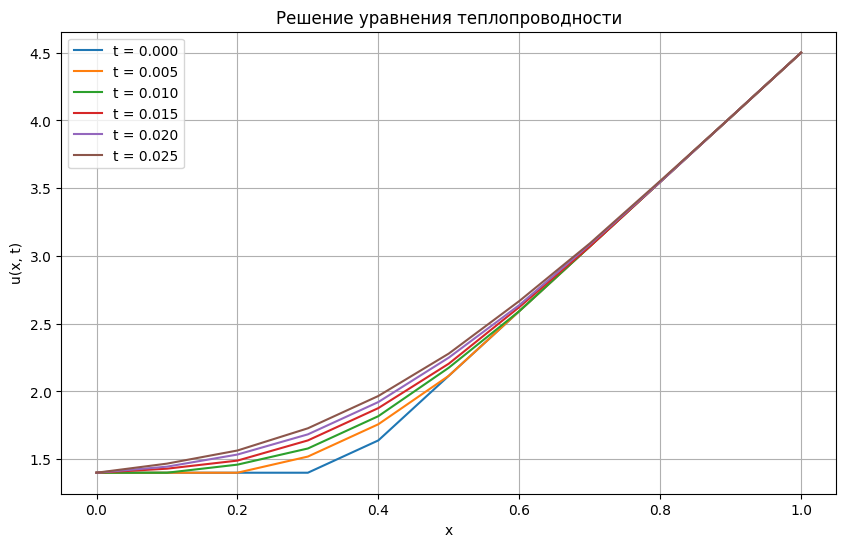

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры задачи
a = 1.4
b = 4.5
c = 0.35
T = 0.025
X = 1.0

# Параметры сетки
h = 0.1  # Шаг по x
tau = 0.005  # Шаг по t
M = int(X / h) + 1  # Количество узлов по x
N = int(T / tau) + 1  # Количество узлов по t

# Функция начального условия
def y(x):
    if x <= c:
        return a
    else:
        return (a - b) / (c - 1) * x + (b * c - a) / (c - 1)

# Создание сетки
x_grid = np.linspace(0, X, M)
t_grid = np.linspace(0, T, N)

# Создание массива для решения
u = np.zeros((N, M))

# Заполнение начального условия
for i in range(M):
    u[0, i] = y(x_grid[i])

# Заполнение граничных условий
for j in range(1, N):
    u[j, 0] = a
    u[j, M - 1] = b

# Явная схема
for j in range(N - 1):
    for i in range(1, M - 1):
        u[j + 1, i] = u[j, i] + tau / h**2 * (u[j, i + 1] - 2 * u[j, i] + u[j, i - 1])

# Вывод таблицы
print("Таблица u(x, t):")
print("-" * 40)
print(f"{'i':<3} {'t':<7}", end="")
for x in x_grid:
    print(f"{x:<8.1f}", end="")
print()
print("-" * 40)
for j in range(N):
    print(f"{j:<3} {t_grid[j]:<7.3f}", end="")
    for i in range(M):
        print(f"{u[j, i]:<8.4f}", end="")
    print()


# Вычисление точного решения (не всегда доступно)
#  Здесь в качестве точного решения используется решение на последнем временном слое
u_exact = u[N-1, :]

# Вычисление абсолютной погрешности 
abs_error = np.abs(u[N-1, :] - u[N-2,:])


# Вывод таблицы с погрешностью (если есть точное решение)
print("\nТаблица |u - u_exact|:")
print("-" * 30)
print(f"{'t':<5} {'x':<7}", end="")
for i in range(M):
    print(f"{x_grid[i]:<8.1f}", end="")
print()
print("-" * 30)
print(f"{t_grid[N-1]:<7.3f}", end="")  # Print the final time step
for i in range(M):
     print(f"{abs_error[i]:<8.4f}", end="")  
print()


# Построение графиков
plt.figure(figsize=(10, 6))
for j in range(0, N, int(N/6) ):  #  выбираем несколько временных слоев для отображения
    plt.plot(x_grid, u[j, :], label=f't = {t_grid[j]:.3f}')

plt.xlabel('x')
plt.ylabel('u(x, t)')
plt.title('Решение уравнения теплопроводности')
plt.legend()
plt.grid(True)
plt.show()

 Лабораторная работа № 9. Решение уравнений Фредгольма 

Сходимость достигнута на итерации 11
Приблизительное решение: [0.         0.00482413 0.00964827 0.0144724  0.01929653 0.02412066
 0.0289448  0.03376893 0.03859306 0.0434172  0.04824133 0.05306546
 0.05788959 0.06271373 0.06753786 0.07236199 0.07718612 0.08201026
 0.08683439 0.09165852 0.09648266 0.10130679 0.10613092 0.11095505
 0.11577919 0.12060332 0.12542745 0.13025159 0.13507572 0.13989985
 0.14472398 0.14954812 0.15437225 0.15919638 0.16402051 0.16884465
 0.17366878 0.17849291 0.18331705 0.18814118 0.19296531 0.19778944
 0.20261358 0.20743771 0.21226184 0.21708598 0.22191011 0.22673424
 0.23155837 0.23638251 0.24120664 0.24603077 0.2508549  0.25567904
 0.26050317 0.2653273  0.27015144 0.27497557 0.2797997  0.28462383
 0.28944797 0.2942721  0.29909623 0.30392037 0.3087445  0.31356863
 0.31839276 0.3232169  0.32804103 0.33286516 0.33768929 0.34251343
 0.34733756 0.35216169 0.35698583 0.36180996 0.36663409 0.37145822
 0.37628236 0.38110649 0.38593062 0.39075476 0.39557889 0.40040302


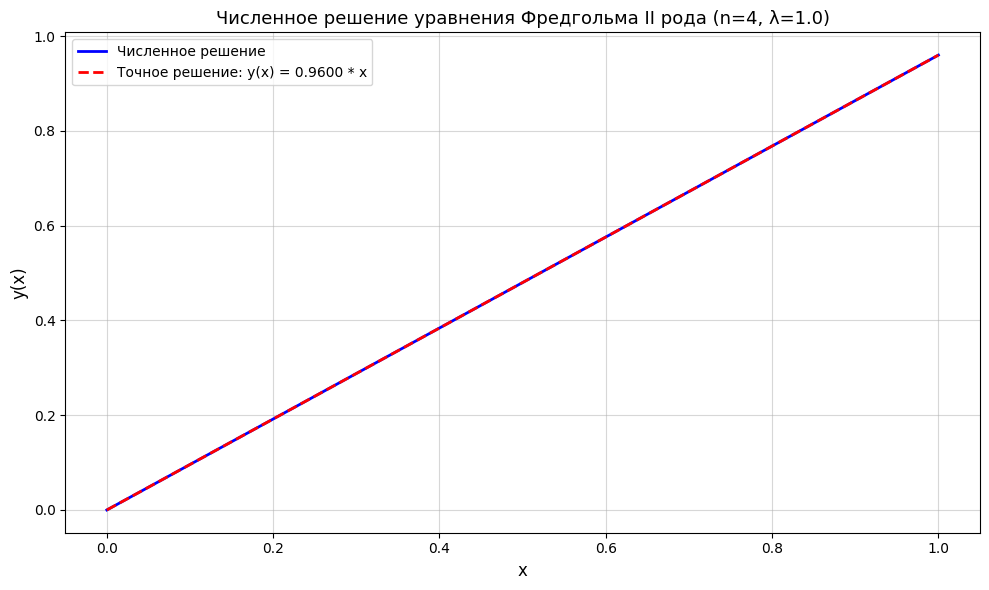

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def fredholm_equation_iteration(n, num_points=100, tolerance=1e-6, max_iterations=100, lambda_param=1.0):
    """
    Численное решение неоднородного интегрального уравнения Фредгольма II рода:
        y(x) = f(x) + λ ∫ K(x,t) y(t) dt,  x ∈ [0,1]
    
    Метод: итерации Пикара (метод последовательных приближений) + квадратура трапеций.
    
    Параметры:
        n: параметр в правой части f(x) = n*x/(n+1)
        num_points: число точек дискретизации
        tolerance: критерий остановки по max-норме
        max_iterations: максимальное число итераций
        lambda_param: параметр λ перед интегралом (по умолчанию 1.0)
    
    Возвращает:
        y: приближённое решение (вектор)
        error: достигнутая точность
        num_iterations: число итераций
    """

    x = np.linspace(0, 1, num_points)
    h = 1.0 / (num_points - 1) if num_points > 1 else 1.0

    # Правая часть f(x)
    f = n * x / (n + 1)

    # Начальное приближение: y0(x) = f(x)
    y = np.copy(f)
    y_prev = np.zeros_like(y)

    # Ядро K(x, t) = 0.5 * x * t
    def kernel(xi, tj):
        return 0.5 * xi * tj

    for iteration in range(max_iterations):
        y_new = np.copy(f)  # начинаем с f(x)

        # Вычисляем интеграл для каждой точки x[i]
        for i in range(num_points):
            integral_sum = 0.0
            for j in range(num_points):
                tj = x[j]
                integrand = kernel(x[i], tj) * y[j]

                # Правило трапеций: веса для концов = h/2, для внутренних = h
                if j == 0 or j == num_points - 1:
                    weight = h / 2.0
                else:
                    weight = h

                integral_sum += integrand * weight

            y_new[i] += lambda_param * integral_sum

        # Оценка ошибки: максимальная разность между текущим и предыдущимx приближением
        error = np.max(np.abs(y_new - y))

        # Обновляем приближение
        y_prev = np.copy(y)
        y = np.copy(y_new)

        # Проверка сходимости
        if error < tolerance:
            print(f"Сходимость достигнута на итерации {iteration + 1}")
            return y, error, iteration + 1

    print("Достигнуто максимальное число итераций. Решение может быть неточным.")
    return y, error, max_iterations

n = 4
y, error, num_iterations = fredholm_equation_iteration(n, num_points=200, tolerance=1e-8)

print(f"Приблизительное решение: {y}")
print(f"Достигнутая ошибка: {error:.2e}")
print(f"Количество итераций: {num_iterations}")

# Построение графика
x_plot = np.linspace(0, 1, len(y))
plt.figure(figsize=(10, 6))
plt.plot(x_plot, y, 'b-', linewidth=2, label='Численное решение')

lambda_used = 1.0
C_exact = (n / (n + 1)) / (1 - lambda_used / 6) if lambda_used != 6 else np.nan
if not np.isnan(C_exact):
    y_exact = C_exact * x_plot
    plt.plot(x_plot, y_exact, 'r--', linewidth=2, label=f'Точное решение: y(x) = {C_exact:.4f} * x')
    print(f"Точное решение: y(x) = {C_exact:.6f} * x")
    print(f"Макс. отклонение от точного: {np.max(np.abs(y - y_exact)):.2e}")

plt.xlabel("x", fontsize=12)
plt.ylabel("y(x)", fontsize=12)
plt.title(f"Численное решение уравнения Фредгольма II рода (n={n}, λ={lambda_used})", fontsize=13)
plt.legend()
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()



Лабораторная работа № 10. Решение уравнений Вольтерра 

   x    | Приближенное | Точное    | Абсолютная погрешность
--------|--------------|-----------|------------------------
0.00  | 1.000000    | 1.000000 | 0.000000
0.02  | 1.100440    | 1.105613 | 0.005173
0.04  | 1.211938    | 1.223359 | 0.011421
0.06  | 1.335800    | 1.354727 | 0.018927
0.08  | 1.473500    | 1.501403 | 0.027903
0.10  | 1.626696    | 1.665291 | 0.038595
0.12  | 1.797256    | 1.848547 | 0.051291
0.14  | 1.987289    | 2.053612 | 0.066323
0.16  | 2.199173    | 2.283250 | 0.084077
0.18  | 2.435596    | 2.540599 | 0.105003
0.20  | 2.699595    | 2.829217 | 0.129622
0.22  | 2.994604    | 3.153144 | 0.158540
0.24  | 3.324510    | 3.516971 | 0.192461
0.26  | 3.693714    | 3.925917 | 0.232204
0.28  | 4.107204    | 4.385923 | 0.278719
0.30  | 4.570638    | 4.903749 | 0.333111
0.32  | 5.090433    | 5.487101 | 0.396668
0.34  | 5.673879    | 6.144762 | 0.470883
0.36  | 6.329259    | 6.886755 | 0.557496
0.38  | 7.065992    | 7.724522 | 0.658530
0.40  | 7.894794    | 8.671138 | 0.7763

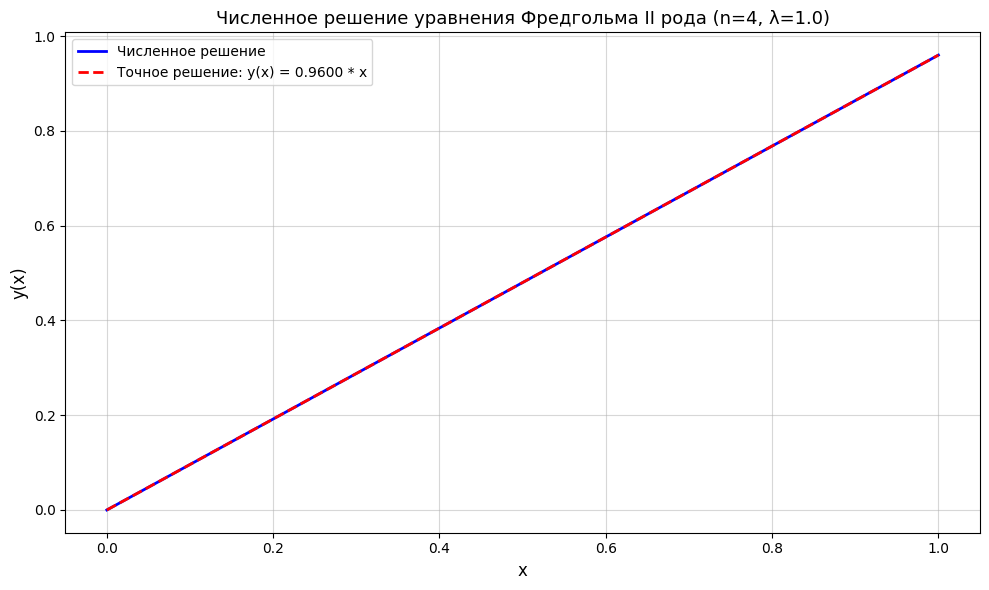


          ПОЛНОЕ ЧИСЛЕННОЕ РЕШЕНИЕ ВО ВСЕХ ТОЧКАХ
   №          x            y(x)        y_точное
------------------------------------------------------------
   1    0.00000      0.00000000      0.00000000
   2    0.00503      0.00482413      0.00482412
   3    0.01005      0.00964827      0.00964824
   4    0.01508      0.01447240      0.01447236
   5    0.02010      0.01929653      0.01929648
   6    0.02513      0.02412066      0.02412060
   7    0.03015      0.02894480      0.02894472
   8    0.03518      0.03376893      0.03376884
   9    0.04020      0.03859306      0.03859296
  10    0.04523      0.04341720      0.04341709
  11    0.05025      0.04824133      0.04824121
  12    0.05528      0.05306546      0.05306533
  13    0.06030      0.05788959      0.05788945
  14    0.06533      0.06271373      0.06271357
  15    0.07035      0.06753786      0.06753769
  16    0.07538      0.07236199      0.07236181
  17    0.08040      0.07718612      0.07718593
  18    0.08543      0.0

In [8]:
import numpy as np
import matplotlib.pyplot as plt

n=4

def exact_solution(x):
    return np.exp(5 * x + x**2)

def approximate_solution(h, n_coeff):
    num_steps = int(1 / h)
    y = np.zeros(num_steps + 1)
    x_values = np.linspace(0, 1, num_steps + 1)
    
    for i in range(num_steps + 1):
        if i == 0:
            y[i] = 1  # y(0) = exp(0) = 1
        else:
            sum_term = 0
            for j in range(i):
                sum_term += h * np.exp(x_values[i]**2 - x_values[j]**2) * y[j]
            y[i] = np.exp(x_values[i]**2) + n_coeff * sum_term
    
    return x_values, y

# Параметры
h = 0.02  # Шаг
n_coeff = 5  # Коэффициент перед интегралом
x_exact = np.linspace(0, 1, int(1/h) + 1)
y_exact = exact_solution(x_exact)

# Приближенное решение
x_approx, y_approx = approximate_solution(h, n_coeff)

# Создание сравнительной таблицы
print("   x    | Приближенное | Точное    | Абсолютная погрешность")
print("--------|--------------|-----------|------------------------")
for i in range(len(x_approx)):
    print(f"{x_approx[i]:.2f}  | {y_approx[i]:.6f}    | {y_exact[i]:.6f} | {abs(y_approx[i] - y_exact[i]):.6f}")

# Построение графика
x_plot = np.linspace(0, 1, len(y))
plt.figure(figsize=(10, 6))
plt.plot(x_plot, y, 'b-', linewidth=2, label='Численное решение')

# Если известно точное решение — добавим для сравнения
lambda_used = 1.0
C_exact = (n / (n + 1)) / (1 - lambda_used / 6) if lambda_used != 6 else np.nan
if not np.isnan(C_exact):
    y_exact = C_exact * x_plot
    plt.plot(x_plot, y_exact, 'r--', linewidth=2, label=f'Точное решение: y(x) = {C_exact:.4f} * x')
    print(f"Точное решение: y(x) = {C_exact:.6f} * x")
    print(f"Макс. отклонение от точного: {np.max(np.abs(y - y_exact)):.2e}")

plt.xlabel("x", fontsize=12)
plt.ylabel("y(x)", fontsize=12)
plt.title(f"Численное решение уравнения Фредгольма II рода (n={n}, λ={lambda_used})", fontsize=13)
plt.legend()
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("          ПОЛНОЕ ЧИСЛЕННОЕ РЕШЕНИЕ ВО ВСЕХ ТОЧКАХ")
print("="*60)
print(f"{'№':>4} {'x':>10} {'y(x)':>15} {'y_точное':>15}")
print("-" * 60)

for i in range(len(x_plot)):
    exact_val = C_exact * x_plot[i] if not np.isnan(C_exact) else np.nan
    print(f"{i+1:>4} {x_plot[i]:>10.5f} {y[i]:>15.8f} {exact_val:>15.8f}")
